# AS4PA - Laboratory session 7

`Student:` **```Ardino Rocco```**<br>
`Master :` **```Physics of Data```**<br>
`Id     :` **```1231629```**<br>
`Mail   :` **```rocco.ardino@studenti.unipd.it```**<br>

# Index <a class="anchor" id="ExI"></a>

1. [Exercise 1](#Ex1.)<br>
    1.1. [Posterior distribution $P(\mu|y_1 \dots y_{15})$, mean and standard deviation](#Ex1.1.)<br>
    1.2. [95% credibility interval for $\mu$](#Ex1.2.)<br>
    1.3. [Posterior distribution with mean, standard deviation and 95% credibility interval](#Ex1.3.)<br>
    1.4. [Analysis with $\text{Norm}(m=30, s^2=16)$ prior](#Ex1.4.)<br>
    1.5. [Comparison of the credibility intervals obtained with the two priors](#Ex1.5.)<br>
2. [Exercise 2](#Ex2.)<br>
    2.1. [Posterior distribution, posterior mean and standard deviation](#Ex2.1.)<br>
    2.2. [95% credibility interval for $\mu$](#Ex2.2.)<br>
    2.3. [Posterior distribution with mean, standard deviation and 95% credibility interval](#Ex2.3.)<br>
    2.4. [Plot with both likelihood and posterior distribution](#Ex2.4.)<br>
3. [Exercise 3](#Ex3.)<br>
    3.1. [Frequentist estimator for $p$](#Ex3.1.)<br>
    3.2. [Posterior distribution $P(p|y)$ for $\text{Beta}(1,10)$ prior for $p$](#Ex3.2.)<br>
    3.3. [Bayesian estimator for $p$, posterior mean and variance, and 95% credibility interval](#Ex3.3.)<br>
    3.4. [Hypotesis test for both the frequentist and bayesian approach](#Ex3.4.)<br>
    3.5. [Frequentist estimator for $p$ (new measurement)](#Ex3.5.)<br>
    3.6. [Bayesian estimator for $p$ with different priors (new measurement)](#Ex3.6.)<br>
    3.7. [Bayesian estimator for $p$, posterior mean and variance, and 95% credibility interval (new measurement)](#Ex3.7.)<br>
    3.8. [Hypotesis test for both the frequentist and bayesian approach (new measurement)](#Ex3.8.)<br>

**Before starting with the exercises, load packages for:**
* **a better plot visualization on jupyter notebook (```repr```);**
* **latex font for text (```latex2exp```);**
* **creating a grid from two vectors for 3D plots (```lattice```).**

In [1]:
library(repr)
library(latex2exp)
library(lattice)

**Moreover, let's define some useful functions for exercises solving:**

* **```compute.mean  :``` compute approximation of the mean through the definition;**
* **```compute.median:``` compute approximation of the median through the definition;**
* **```compute.var   :``` compute approximation of the variance through the definition;**
* **```get.x.dmax    :``` compute and get the most probable value (mode) of the distribution;**
* **```get.c.int     :``` compute and get the bounds of the XX% credibility interval.**

**```compute.mean``` function**

In [2]:
compute.mean <- function(x, d) {
    Dx   <- x[2] - x[1]
    mean <- sum(x * Dx * d)
    
    return(mean)
}

**```compute.median``` function**

In [3]:
compute.median <- function(x, d) {
    Dx <- x[2] - x[1]
    d  <- d*Dx
    
    for (i in 1:(length(d)-1)) {
        if (sum(d[1:i])<0.5 & sum(d[1:(i+1)])>0.5) {
            m   <- (sum(d[1:(i+1)]) - sum(d[1:i])) / (x[i+1] - x[i])
            q   <- sum(d[1:i])
            x.m <- (0.5 - q) / m + x[i]
        }
    }
    
    return(x.m)
}

**```compute.var``` function**

In [4]:
compute.var <- function(x, d) {
    Dx   <- x[2] - x[1]
    mean <- compute.mean(x, d)
    var  <- sum((x-mean)^2 * Dx * d)
    
    return(var)
}

**```get.x.dmax``` function**

In [5]:
get.x.dmax <- function(x, d) {
    i   <- which.max(d)
    
    if (i == 1 | i==length(x)) {
        return(x[i])
    }
    
    # find most probable value through parabolic approximation
    x1 <- x[i-1]
    x2 <- x[i]
    x3 <- x[i+1]
    y1 <- d[i-1]
    y2 <- d[i]
    y3 <- d[i+1]
    
    den <- (x1 - x2) * (x1 - x3) * (x2 - x3)
    A   <- (x3 * (y2 - y1) + x2 * (y1 - y3) + x1 * (y3 - y2)) / den
    B   <- (x3*x3 * (y1 - y2) + x2*x2 * (y3 - y1) + x1*x1 * (y2 - y3)) / den
    C   <- (x2 * x3 * (x2 - x3) * y1 + x3 * x1 * (x3 - x1) * y2 + x1 * x2 * (x1 - x2) * y3) / den

    x.m <- -B / (2*A);
    
    return(x.m)
}

**```get.c.int``` function**

In [6]:
get.c.int <- function(x, d, cl=0.95) {
    delta.x <- x[2] - x[1]
    d       <- d*delta.x
    alpha   <- 1-cl
    
    # find credibility interval bounds through linear approximation
    for (i in 1:(length(d)-1)) {
        if (sum(d[1:i])<alpha/2 & sum(d[1:(i+1)])>alpha/2) {
            m   <- (sum(d[1:(i+1)]) - sum(d[1:i])) / (x[i+1] - x[i])
            q   <- sum(d[1:i])
            x.1 <- (alpha/2 - q) / m + x[i]
        }
        if (sum(d[1:i])<(1-alpha/2) & sum(d[1:(i+1)])>(1-alpha/2)) {
            m   <- (sum(d[1:(i+1)]) - sum(d[1:i])) / (x[i+1] - x[i])
            q   <- sum(d[1:i])
            x.2 <- (1 - alpha/2 - q) / m + x[i]
        }
    }
    
    return(c(x.1,x.2))
}

***
## Exercise 1 <a class="anchor" id="Ex1."></a>
* [Index](#ExI)
***

**Load data into a vector and define the variance (known parameter)**

In [7]:
data <- c(26.8, 31.9, 28.0, 26.3, 28.5, 
          18.6, 28.3, 27.2, 22.3, 28.5, 
          20.9, 25.0, 16.3, 27.5, 31.5)

In [8]:
var <- 16

**Define the likelihood function in R**

In [9]:
p.log.like <- function(data, mu, variance=var) {
    logL <- 0.0
    for (x.k in data) {
        logL <- logL + dnorm(x.k, mean=mu, sd=sqrt(variance), log=TRUE)
    }
    return(logL)
}

### 1.1. - Posterior distribution $P(\mu|y_1 \dots y_{15})$, mean and standard deviation <a class="anchor" id="Ex1.1."></a>

**Let's assume a $\text{Norm}(m=20,s^2=25)$ prior for $\mu$**

In [10]:
n.p <- 1001 # number of points in the plots
mu  <- seq(0, 40, length.out=n.p)
Dmu <- mu[2] - mu[1]

In [11]:
p.log.prior.1 <- dnorm(mu, mean=20, sd=5, log=TRUE)

**Log posterior distribution**

In [12]:
p.log.post.1 <- p.log.like(data, mu) + p.log.prior.1

**Normalized posterior distribution**

In [13]:
p.post.1   <- exp(p.log.post.1)
p.post.n.1 <- p.post.1 / (Dmu * sum(p.post.1))

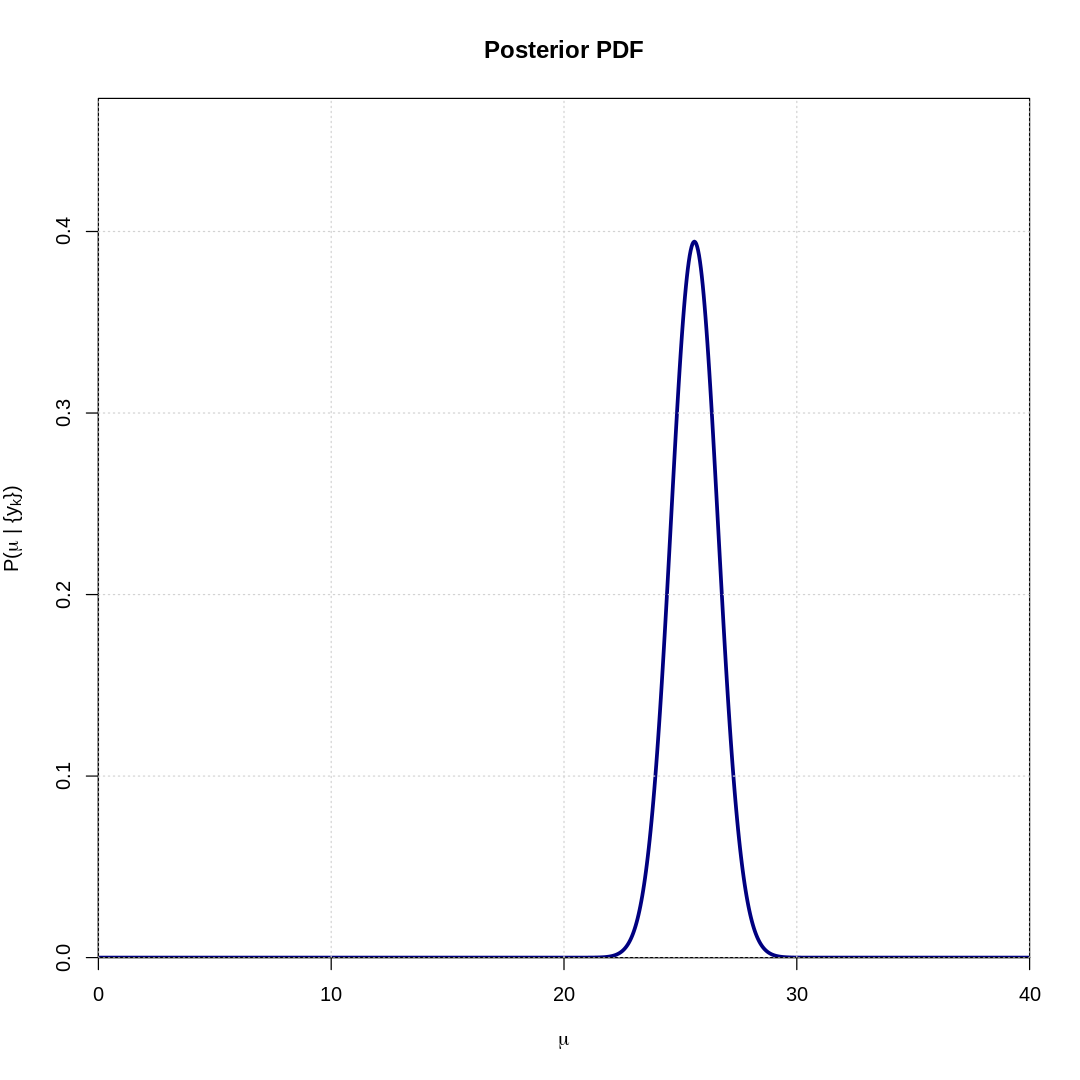

In [14]:
options(repr.plot.width=9, repr.plot.height=9)
plot(mu, p.post.n.1, 
     xaxs='i', yaxs='i', col='navy', 
     type='l', lty=1, lwd = 3, 
     ylim=c(0,1.2*max(p.post.n.1)), 
     xlab=expression(mu),
     ylab=expression(paste("P","(", mu, " | {y"["k"],"})")),
     main='Posterior PDF')
grid()

**Posterior mean and variance**

In [15]:
mu.mean.1 <- compute.mean(mu, p.post.n.1)
mu.var.1  <- compute.var(mu,  p.post.n.1)
mu.sd.1   <- sqrt(mu.var.1)

In [16]:
cat("Posterior mean    :", mu.mean.1, "\n")
cat("Posterior variance:", mu.var.1, "\n")
cat("Posterior s.d.    :", mu.sd.1)

Posterior mean    : 25.60102 
Posterior variance: 1.023018 
Posterior s.d.    : 1.011443

### 1.2. - 95% credibility interval for $\mu$ <a class="anchor" id="Ex1.2."></a>

In [17]:
mu.m.1 <- get.x.dmax(mu, p.post.n.1) #most probable value
mu.c.1 <- get.c.int(mu,  p.post.n.1) #95% credibility interval

In [18]:
cat("Most probable value:", mu.m.1)

Most probable value: 25.60102

In [19]:
cat("95% credibility interval: [", mu.c.1[1], " ", mu.c.1[2], "]", sep="")

95% credibility interval: [23.59871 27.56341]

### 1.3. - Posterior distribution with mean, standard deviation and 95% credibility interval <a class="anchor" id="Ex1.3."></a>

In [20]:
# code for polygon function
mus.1  <- seq(mu.c.1[1], mu.c.1[2], length.out=length(mu))
Dmus.1 <- mus.1[2] - mus.1[1]

ys.1 <- p.log.like(data, mus.1) + dnorm(mus.1, mean=20, sd=5, log=TRUE)
ys.1 <- exp(ys.1) / (Dmu * sum(p.post.1))

mus.1 <- c(mu.c.1[1], mus.1, mu.c.1[2])
ys.1  <- c(0, ys.1, 0)

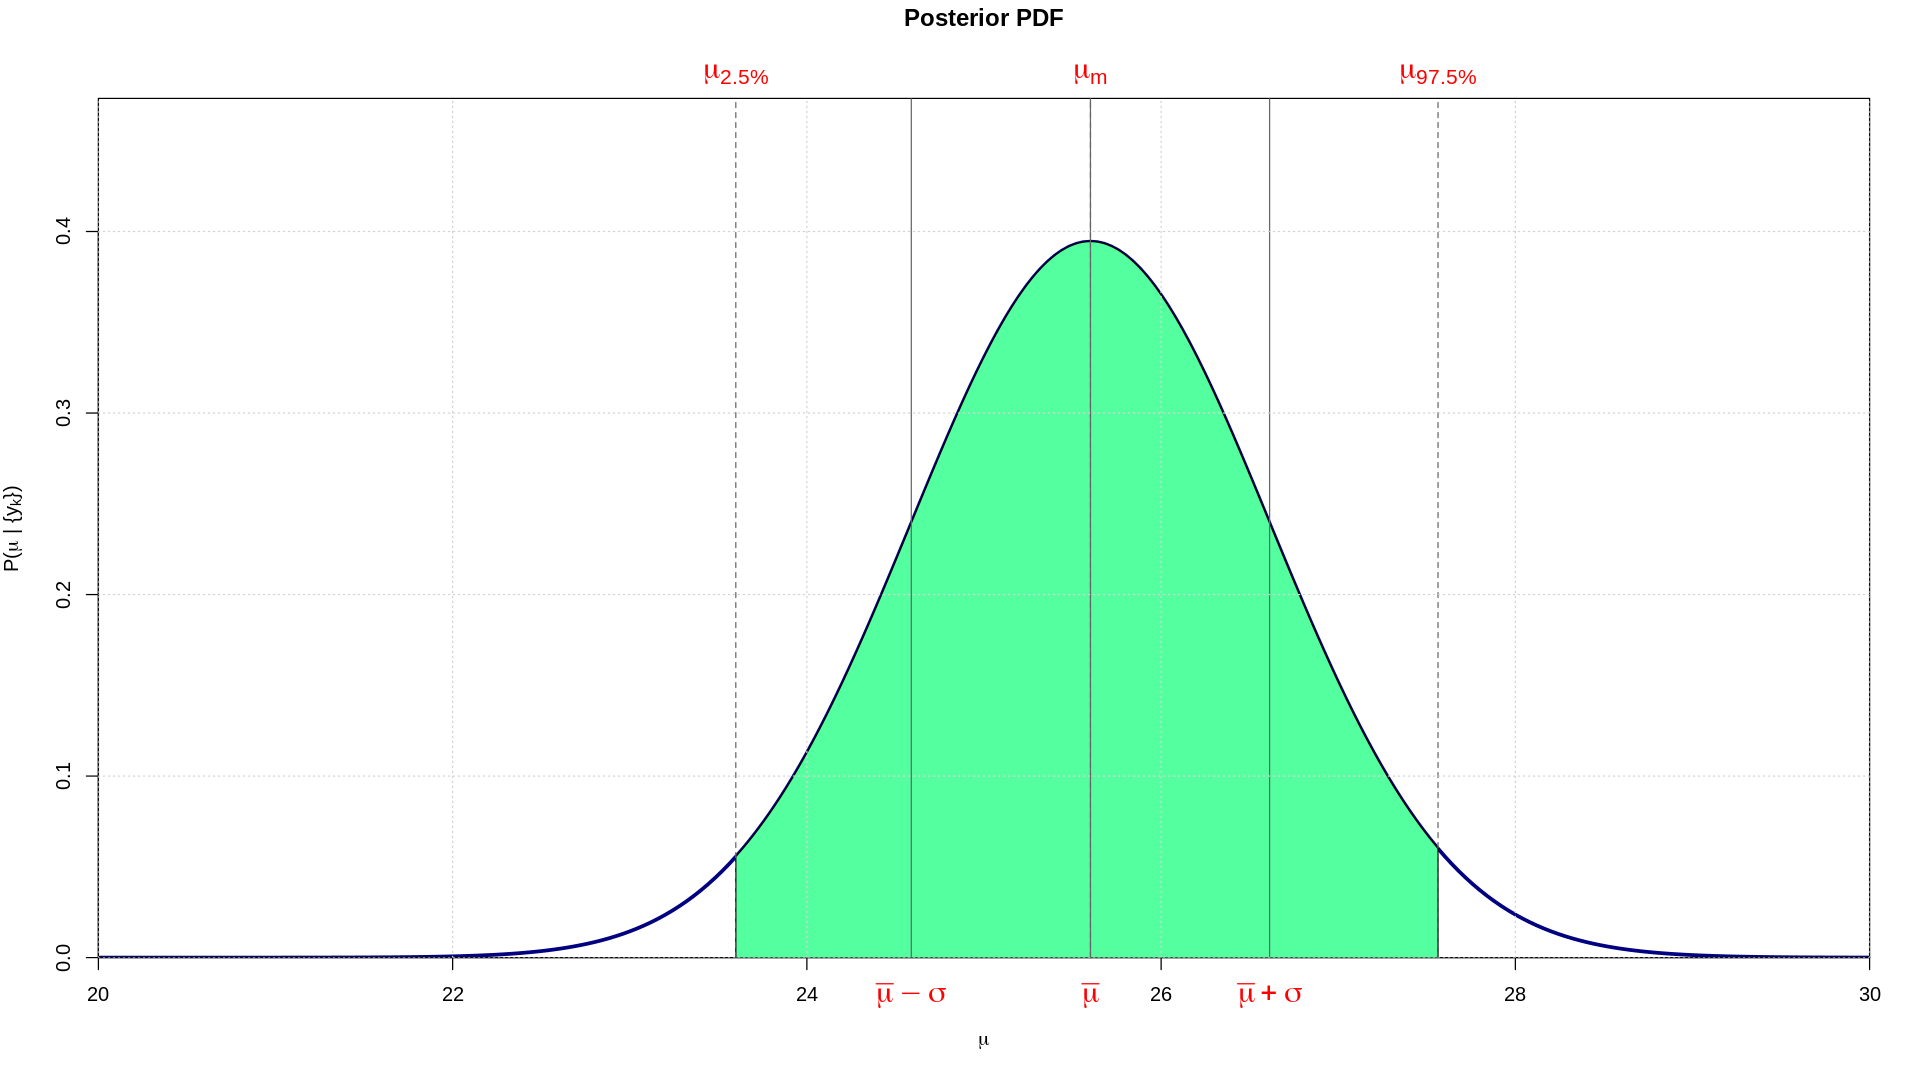

In [21]:
options(repr.plot.width=16, repr.plot.height=9)
plot(mu, p.post.n.1, 
     xaxs='i', yaxs='i', col='navy', 
     type='l', lty=1, lwd=3,
     xlim=c(20,30),
     ylim=c(0,1.2*max(p.post.n.1)), 
     xlab=expression(mu),
     ylab=expression(paste("P","(", mu, " | {y"["k"],"})")))

polygon(x=mus.1, y=ys.1, col='seagreen1')
abline(v=mu.m.1,    col="grey40", lty=2)
abline(v=mu.c.1[1], col="grey40", lty=2)
abline(v=mu.c.1[2], col="grey40", lty=2)

abline(v=mu.mean.1,         col="grey40", lty=1)
abline(v=mu.mean.1-mu.sd.1, col="grey40", lty=1)
abline(v=mu.mean.1+mu.sd.1, col="grey40", lty=1)

text(mu.m.1,    1.05*par("usr")[4], labels=expression(mu["m"]),     pos=1, cex=1.5, col="red", xpd=TRUE)
text(mu.c.1[1], 1.05*par("usr")[4], labels=expression(mu["2.5%"]),  pos=1, cex=1.5, col="red", xpd=TRUE)
text(mu.c.1[2], 1.05*par("usr")[4], labels=expression(mu["97.5%"]), pos=1, cex=1.5, col="red", xpd=TRUE)

text(mu.mean.1,         -0.01, labels=TeX("$\\bar{\\mu}$"),           pos=1, cex=1.5, col="red", xpd=TRUE)
text(mu.mean.1-mu.sd.1, -0.01, labels=TeX("$\\bar{\\mu} - \\sigma$"), pos=1, cex=1.5, col="red", xpd=TRUE)
text(mu.mean.1+mu.sd.1, -0.01, labels=TeX("$\\bar{\\mu} + \\sigma$"), pos=1, cex=1.5, col="red", xpd=TRUE)
title("Posterior PDF", line=3)
grid()

### 1.4. - Analysis with $\text{Norm}(m=30, s^2=16)$ prior <a class="anchor" id="Ex1.4."></a>

**Let's assume a $\text{Norm}(m=30,s^2=16)$ prior for $\mu$**

In [22]:
n.p <- 1001 # number of points in the plots
mu  <- seq(0, 40, length.out=n.p)
Dmu <- mu[2] - mu[1]

In [23]:
p.log.prior.2 <- dnorm(mu, mean=30, sd=4, log=TRUE)

**Normalized likelihood**

In [24]:
p.like.2   <- exp(p.log.like(data,mu))
p.like.n.2 <- p.like.2 / (Dmu * sum(p.like.2))

**Log posterior distribution**

In [25]:
p.log.post.2 <- p.log.like(data, mu) + p.log.prior.2

**Normalized posterior distribution**

In [26]:
p.post.2   <- exp(p.log.post.2)
p.post.n.2 <- p.post.2 / (Dmu * sum(p.post.2))

**Plot with likelihood, prior and posterior**

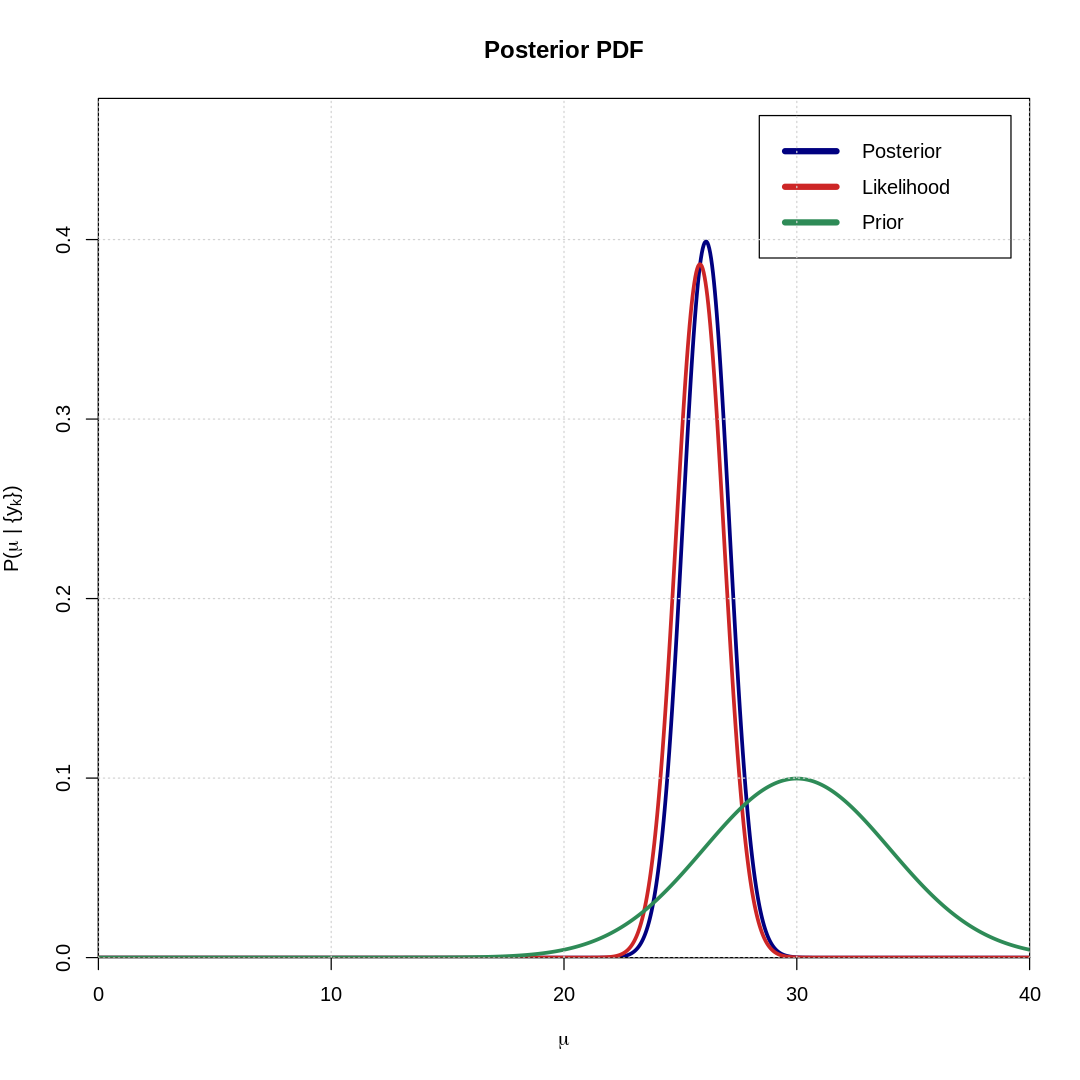

In [27]:
options(repr.plot.width=9, repr.plot.height=9)
plot(mu, p.post.n.2, 
     xaxs='i', yaxs='i', col='navy', 
     type='l', lty=1, lwd = 3, 
     ylim=c(0,1.2*max(p.post.n.2)), 
     xlab=expression(mu),
     ylab=expression(paste("P","(", mu, " | {y"["k"],"})")),
     main='Posterior PDF')
lines(mu, p.like.n.2, col='firebrick3',lwd=3, lty=1)
lines(mu, exp(p.log.prior.2), col='seagreen',lwd=3, lty=1)

legend("topright",
       inset=0.02, 
       legend=c("Posterior", "Likelihood", "Prior"),
       col=c("navy", "firebrick3", "seagreen"), 
       lty=1:1, 
       cex=1,
       box.lty=1,
       lwd=5)
grid()

**Posterior mean and variance**

In [28]:
mu.mean.2 <- compute.mean(mu, p.post.n.2)
mu.var.2  <- compute.var(mu, p.post.n.2)
mu.sd.2   <- sqrt(mu.var.2)

In [29]:
cat("Posterior mean    :", mu.mean.2, "\n")
cat("Posterior variance:", mu.var.2,  "\n")
cat("Posterior s.d.    :", mu.sd.2)

Posterior mean    : 26.1 
Posterior variance: 1 
Posterior s.d.    : 1

**95% credibility interval for $\mu$**

In [30]:
mu.m.2 <- get.x.dmax(mu, p.post.n.2) #most probable value
mu.c.2 <- get.c.int(mu,  p.post.n.2) #95% credibility interval

In [31]:
cat("Most probable value:", mu.m.2)

Most probable value: 26.1

In [32]:
cat("95% credibility interval: [", mu.c.2[1], " ", mu.c.2[2], "]", sep="")

95% credibility interval: [24.12016 28.03984]

**Plot with the previous quantities visualized**

In [33]:
# code for polygon function
mus.2  <- seq(mu.c.2[1], mu.c.2[2], length.out=length(mu))
Dmus.2 <- mus.2[2] - mus.2[1]

ys.2 <- p.log.like(data, mus.2) + dnorm(mus.2, mean=30, sd=4, log=TRUE)
ys.2 <- exp(ys.2) / (Dmu * sum(p.post.2))

mus.2 <- c(mu.c.2[1], mus.2, mu.c.2[2])
ys.2  <- c(0, ys.2, 0)

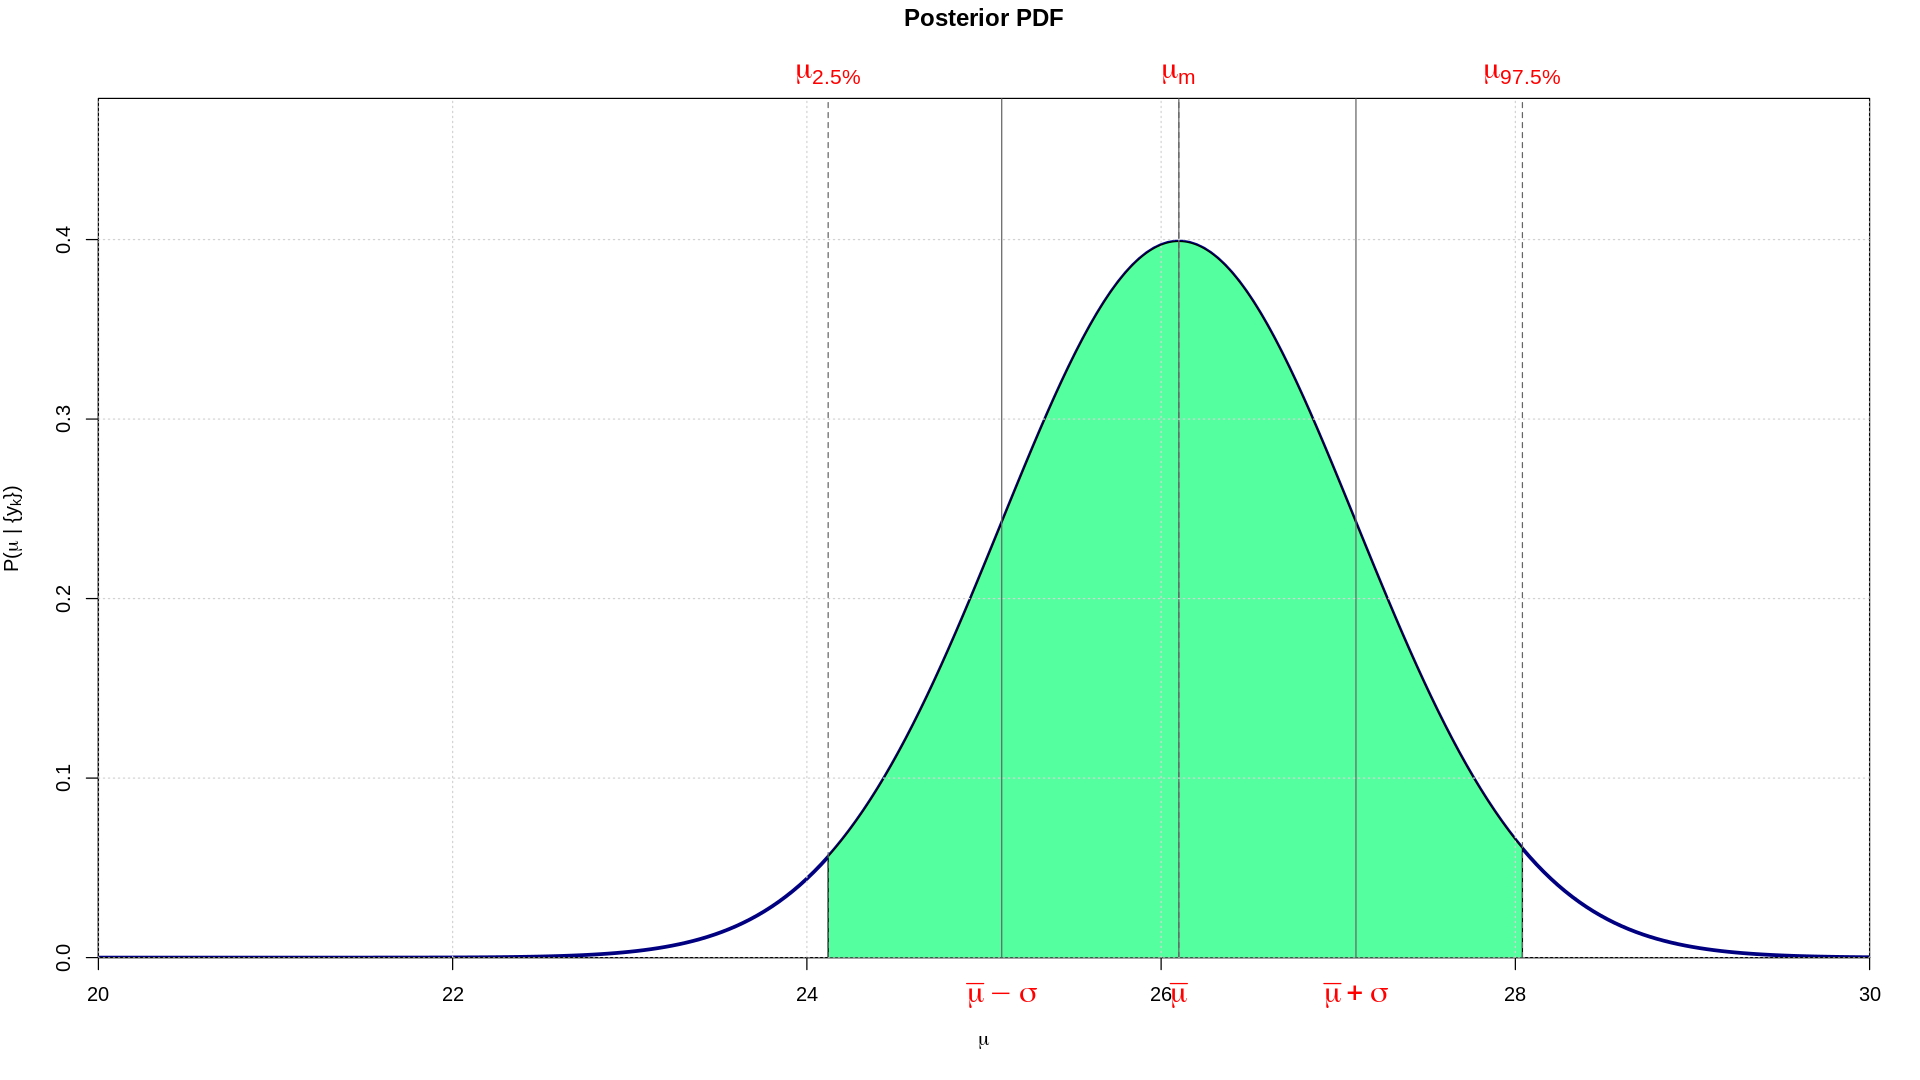

In [34]:
options(repr.plot.width=16, repr.plot.height=9)
plot(mu, p.post.n.2, 
     xaxs='i', yaxs='i', col='navy', 
     type='l', lty=1, lwd=3,
     xlim=c(20,30),
     ylim=c(0,1.2*max(p.post.n.2)), 
     xlab=expression(mu),
     ylab=expression(paste("P","(", mu, " | {y"["k"],"})")))

polygon(x=mus.2, y=ys.2, col='seagreen1')
abline(v=mu.m.2,    col="grey40", lty=2)
abline(v=mu.c.2[1], col="grey40", lty=2)
abline(v=mu.c.2[2], col="grey40", lty=2)

abline(v=mu.mean.2,         col="grey40", lty=1)
abline(v=mu.mean.2-mu.sd.2, col="grey40", lty=1)
abline(v=mu.mean.2+mu.sd.2, col="grey40", lty=1)

text(mu.m.2,    1.05*par("usr")[4], labels=expression(mu["m"]),     pos=1, cex=1.5, col="red", xpd=TRUE)
text(mu.c.2[1], 1.05*par("usr")[4], labels=expression(mu["2.5%"]),  pos=1, cex=1.5, col="red", xpd=TRUE)
text(mu.c.2[2], 1.05*par("usr")[4], labels=expression(mu["97.5%"]), pos=1, cex=1.5, col="red", xpd=TRUE)

text(mu.mean.2,         -0.01, labels=TeX("$\\bar{\\mu}$"),           pos=1, cex=1.5, col="red", xpd=TRUE)
text(mu.mean.2-mu.sd.2, -0.01, labels=TeX("$\\bar{\\mu} - \\sigma$"), pos=1, cex=1.5, col="red", xpd=TRUE)
text(mu.mean.2+mu.sd.2, -0.01, labels=TeX("$\\bar{\\mu} + \\sigma$"), pos=1, cex=1.5, col="red", xpd=TRUE)
title("Posterior PDF", line=3)
grid()

### 1.5. - Comparison of the credibility intervals obtained with the two priors <a class="anchor" id="Ex1.5."></a>

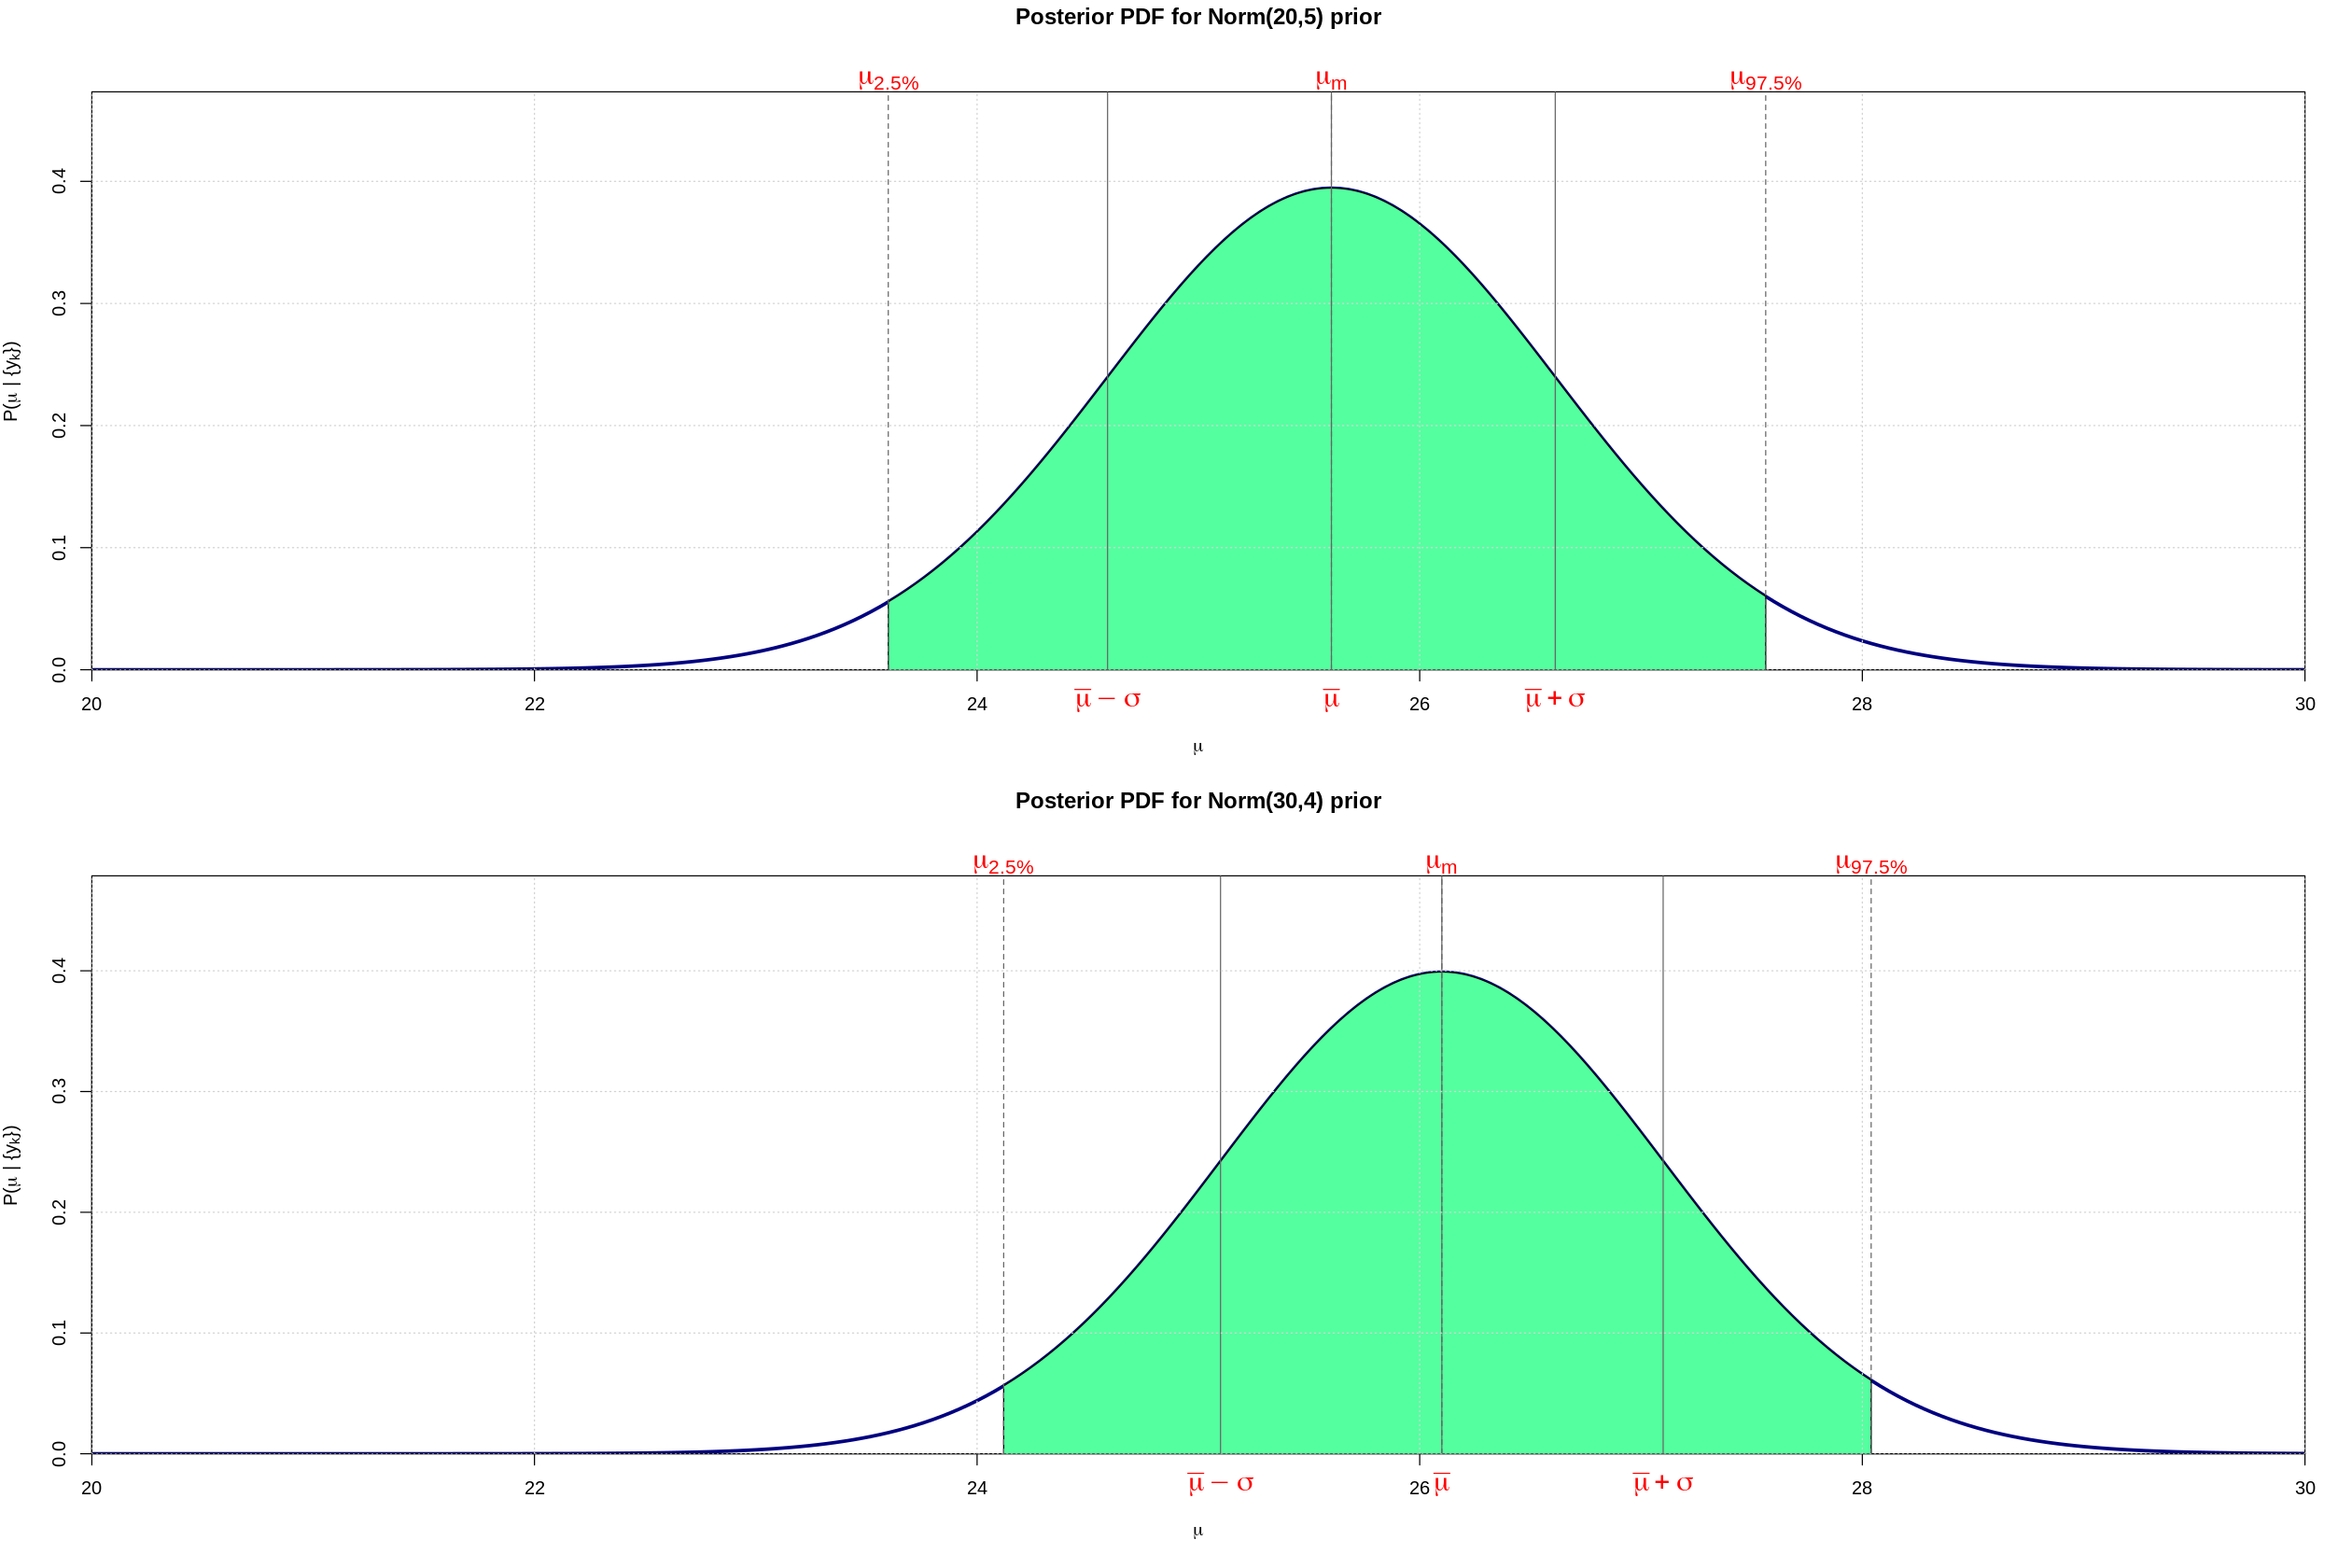

In [35]:
par(mfrow=c(2, 1))
options(repr.plot.width=21, repr.plot.height=14)

plot(mu, p.post.n.1, 
     xaxs='i', yaxs='i', col='navy', 
     type='l', lty=1, lwd=3,
     xlim=c(20,30),
     ylim=c(0,1.2*max(p.post.n.1)), 
     xlab=expression(mu),
     ylab=expression(paste("P","(", mu, " | {y"["k"],"})")))

polygon(x=mus.1, y=ys.1, col='seagreen1')
abline(v=mu.m.1,    col="grey40", lty=2)
abline(v=mu.c.1[1], col="grey40", lty=2)
abline(v=mu.c.1[2], col="grey40", lty=2)

abline(v=mu.mean.1,         col="grey40", lty=1)
abline(v=mu.mean.1-mu.sd.1, col="grey40", lty=1)
abline(v=mu.mean.1+mu.sd.1, col="grey40", lty=1)

text(mu.m.1,    1.05*par("usr")[4], labels=expression(mu["m"]),     pos=1, cex=1.5, col="red", xpd=TRUE)
text(mu.c.1[1], 1.05*par("usr")[4], labels=expression(mu["2.5%"]),  pos=1, cex=1.5, col="red", xpd=TRUE)
text(mu.c.1[2], 1.05*par("usr")[4], labels=expression(mu["97.5%"]), pos=1, cex=1.5, col="red", xpd=TRUE)

text(mu.mean.1,         -0.01, labels=TeX("$\\bar{\\mu}$"),           pos=1, cex=1.5, col="red", xpd=TRUE)
text(mu.mean.1-mu.sd.1, -0.01, labels=TeX("$\\bar{\\mu} - \\sigma$"), pos=1, cex=1.5, col="red", xpd=TRUE)
text(mu.mean.1+mu.sd.1, -0.01, labels=TeX("$\\bar{\\mu} + \\sigma$"), pos=1, cex=1.5, col="red", xpd=TRUE)
title("Posterior PDF for Norm(20,5) prior", line=3)
grid()



plot(mu, p.post.n.2, 
     xaxs='i', yaxs='i', col='navy', 
     type='l', lty=1, lwd=3,
     xlim=c(20,30),
     ylim=c(0,1.2*max(p.post.n.2)), 
     xlab=expression(mu),
     ylab=expression(paste("P","(", mu, " | {y"["k"],"})")))

polygon(x=mus.2, y=ys.2, col='seagreen1')
abline(v=mu.m.2,    col="grey40", lty=2)
abline(v=mu.c.2[1], col="grey40", lty=2)
abline(v=mu.c.2[2], col="grey40", lty=2)

abline(v=mu.mean.2,         col="grey40", lty=1)
abline(v=mu.mean.2-mu.sd.2, col="grey40", lty=1)
abline(v=mu.mean.2+mu.sd.2, col="grey40", lty=1)

text(mu.m.2,    1.05*par("usr")[4], labels=expression(mu["m"]),     pos=1, cex=1.5, col="red", xpd=TRUE)
text(mu.c.2[1], 1.05*par("usr")[4], labels=expression(mu["2.5%"]),  pos=1, cex=1.5, col="red", xpd=TRUE)
text(mu.c.2[2], 1.05*par("usr")[4], labels=expression(mu["97.5%"]), pos=1, cex=1.5, col="red", xpd=TRUE)

text(mu.mean.2,         -0.01, labels=TeX("$\\bar{\\mu}$"),           pos=1, cex=1.5, col="red", xpd=TRUE)
text(mu.mean.2-mu.sd.2, -0.01, labels=TeX("$\\bar{\\mu} - \\sigma$"), pos=1, cex=1.5, col="red", xpd=TRUE)
text(mu.mean.2+mu.sd.2, -0.01, labels=TeX("$\\bar{\\mu} + \\sigma$"), pos=1, cex=1.5, col="red", xpd=TRUE)
title("Posterior PDF for Norm(30,4) prior", line=3)
grid()

***
## Exercise 2 <a class="anchor" id="Ex2."></a>
* [Index](#ExI)
***

**Load data into a vector and define the variance (known parameter)**

In [36]:
data <- c(4.09, 4.79, 4.68, 4.49, 1.87, 5.85, 2.62, 5.09, 
          5.58, 2.40, 8.68, 6.27, 4.07, 6.30, 4.78, 4.47)

In [37]:
var <- 4

**Define the prior function in R**

In [38]:
f.prior <- function(x) {
    ifelse(x>0 & x<=8,
           ifelse(x<=5,
                  ifelse(x<=3,
                         x,
                         3),
                  8.0-x),
           0.0)
}

**Define the likelihood function in R**

In [39]:
p.log.like <- function(data, mu, variance=var) {
    logL <- 0.0
    for (x.k in data) {
        logL <- logL + dnorm(x.k, mean=mu, sd=sqrt(variance), log=TRUE)
    }
    return(logL)
}

### 2.1. - Posterior distribution, posterior mean and standard deviation <a class="anchor" id="Ex2.1."></a>

In [40]:
n.p <- 1001 # number of points in the plots
mu  <- seq(0, 10, length.out=n.p)
Dmu <- mu[2] - mu[1]

In [41]:
p.prior <- f.prior(mu)

**Log posterior distribution**

In [42]:
p.log.post <- p.log.like(data, mu) + log(p.prior)

**Normalized posterior distribution**

In [43]:
p.post   <- exp(p.log.post)
p.post.n <- p.post / (Dmu * sum(p.post))

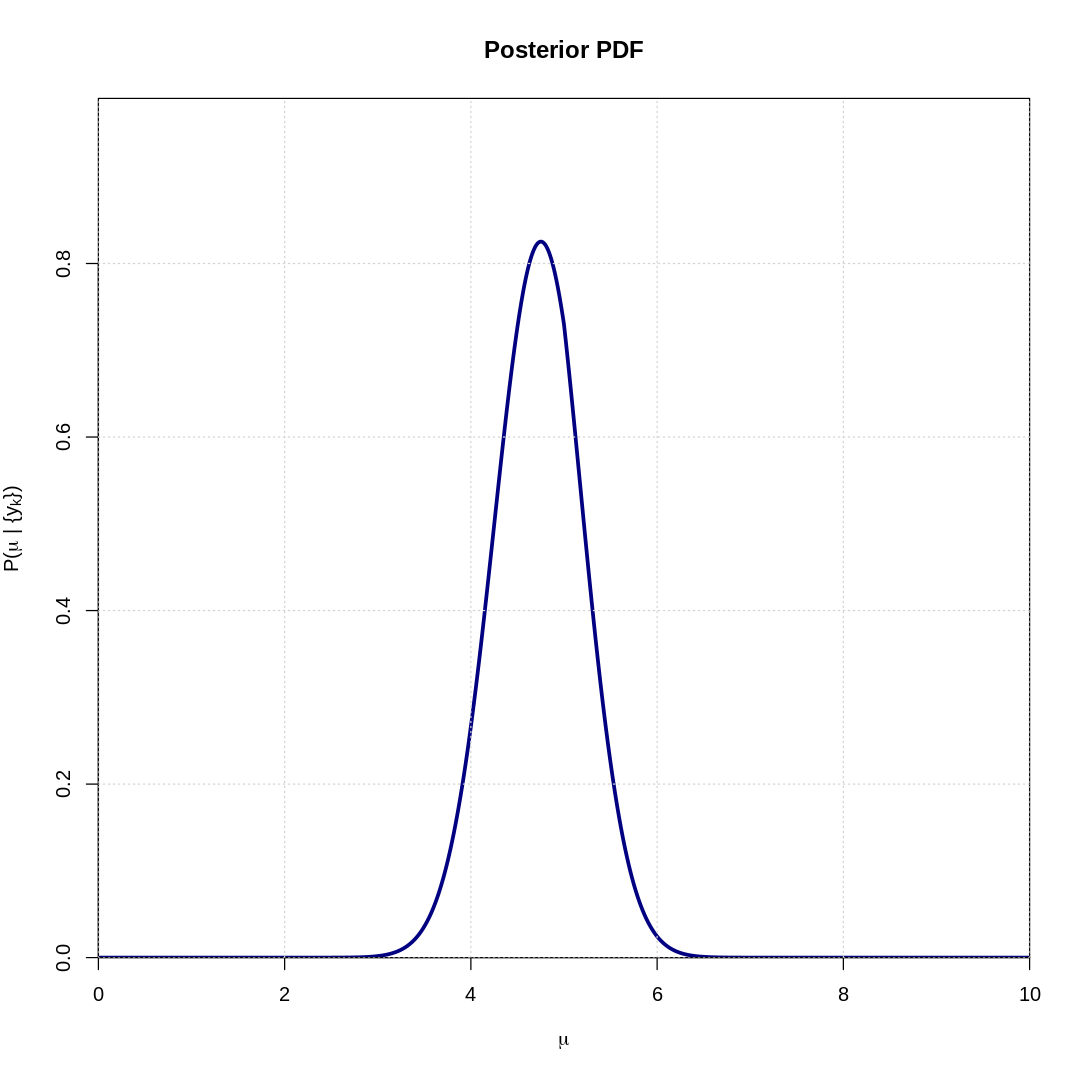

In [44]:
options(repr.plot.width=9, repr.plot.height=9)
plot(mu, p.post.n, 
     xaxs='i', yaxs='i', col='navy', 
     type='l', lty=1, lwd = 3, 
     ylim=c(0,1.2*max(p.post.n)), 
     xlab=expression(mu),
     ylab=expression(paste("P","(", mu, " | {y"["k"],"})")),
     main='Posterior PDF')
grid()

**Posterior mean and variance**

In [45]:
mu.mean <- compute.mean(mu, p.post.n)
mu.var  <- compute.var(mu,  p.post.n)
mu.sd   <- sqrt(mu.var)

In [46]:
cat("Posterior mean    :", mu.mean, "\n")
cat("Posterior variance:", mu.var, "\n")
cat("Posterior s.d.    :", mu.sd)

Posterior mean    : 4.725188 
Posterior variance: 0.2340493 
Posterior s.d.    : 0.4837864

### 2.2. - 95% credibility interval for $\mu$ <a class="anchor" id="Ex2.2."></a>

In [47]:
mu.m <- get.x.dmax(mu, p.post.n) #most probable value
mu.c <- get.c.int(mu,  p.post.n) #95% credibility interval

In [48]:
cat("Most probable value:", mu.m)

Most probable value: 4.751875

In [49]:
cat("95% credibility interval: [", mu.c[1], " ", mu.c[2], "]", sep="")

95% credibility interval: [3.759796 5.659925]

### 2.3. - Posterior distribution with mean, standard deviation and 95% credibility interval <a class="anchor" id="Ex2.3."></a>

In [50]:
# code for polygon function
mus  <- seq(mu.c[1], mu.c[2], length.out=length(mu))
Dmus <- mus[2] - mus[1]

ys <- p.log.like(data, mus) + log(f.prior(mus))
ys <- exp(ys) / (Dmu * sum(p.post))

mus <- c(mu.c[1], mus, mu.c[2])
ys  <- c(0, ys, 0)

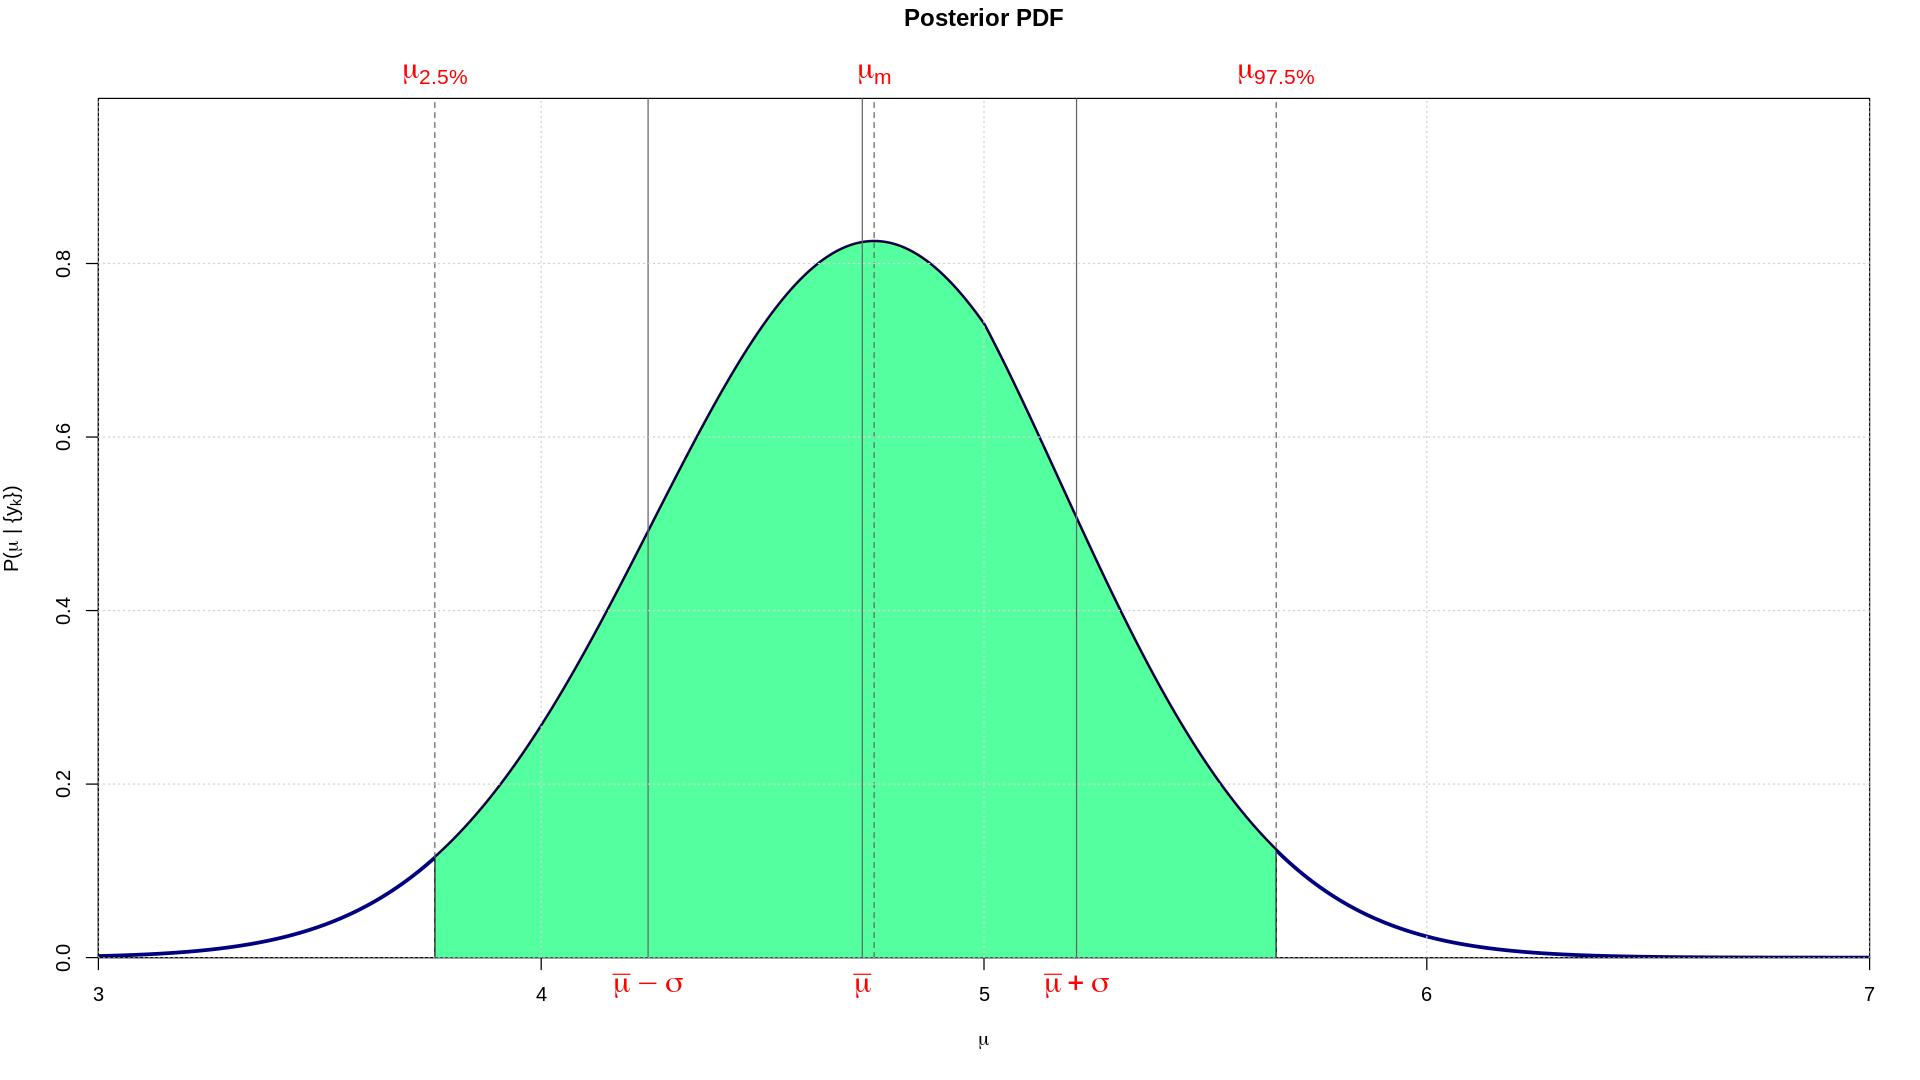

In [51]:
options(repr.plot.width=16, repr.plot.height=9)
plot(mu, p.post.n, 
     xaxs='i', yaxs='i', col='navy', 
     type='l', lty=1, lwd=3,
     xlim=c(3,7),
     ylim=c(0,1.2*max(p.post.n)), 
     xlab=expression(mu),
     ylab=expression(paste("P","(", mu, " | {y"["k"],"})")))

polygon(x=mus, y=ys, col='seagreen1')
abline(v=mu.m,    col="grey40", lty=2)
abline(v=mu.c[1], col="grey40", lty=2)
abline(v=mu.c[2], col="grey40", lty=2)

abline(v=mu.mean,       col="grey40", lty=1)
abline(v=mu.mean-mu.sd, col="grey40", lty=1)
abline(v=mu.mean+mu.sd, col="grey40", lty=1)

text(mu.m,    1.05*par("usr")[4], labels=expression(mu["m"]),     pos=1, cex=1.5, col="red", xpd=TRUE)
text(mu.c[1], 1.05*par("usr")[4], labels=expression(mu["2.5%"]),  pos=1, cex=1.5, col="red", xpd=TRUE)
text(mu.c[2], 1.05*par("usr")[4], labels=expression(mu["97.5%"]), pos=1, cex=1.5, col="red", xpd=TRUE)

text(mu.mean,       -0.01, labels=TeX("$\\bar{\\mu}$"),           pos=1, cex=1.5, col="red", xpd=TRUE)
text(mu.mean-mu.sd, -0.01, labels=TeX("$\\bar{\\mu} - \\sigma$"), pos=1, cex=1.5, col="red", xpd=TRUE)
text(mu.mean+mu.sd, -0.01, labels=TeX("$\\bar{\\mu} + \\sigma$"), pos=1, cex=1.5, col="red", xpd=TRUE)
title("Posterior PDF", line=3)
grid()

### 2.4. - Plot with both likelihood and posterior distribution <a class="anchor" id="Ex2.4."></a>

In [52]:
p.like    <- exp(p.log.like(data,mu))
p.like.n  <- p.like / (Dmu * sum(p.like))
p.prior.n <- p.prior / (Dmu * sum(p.prior))

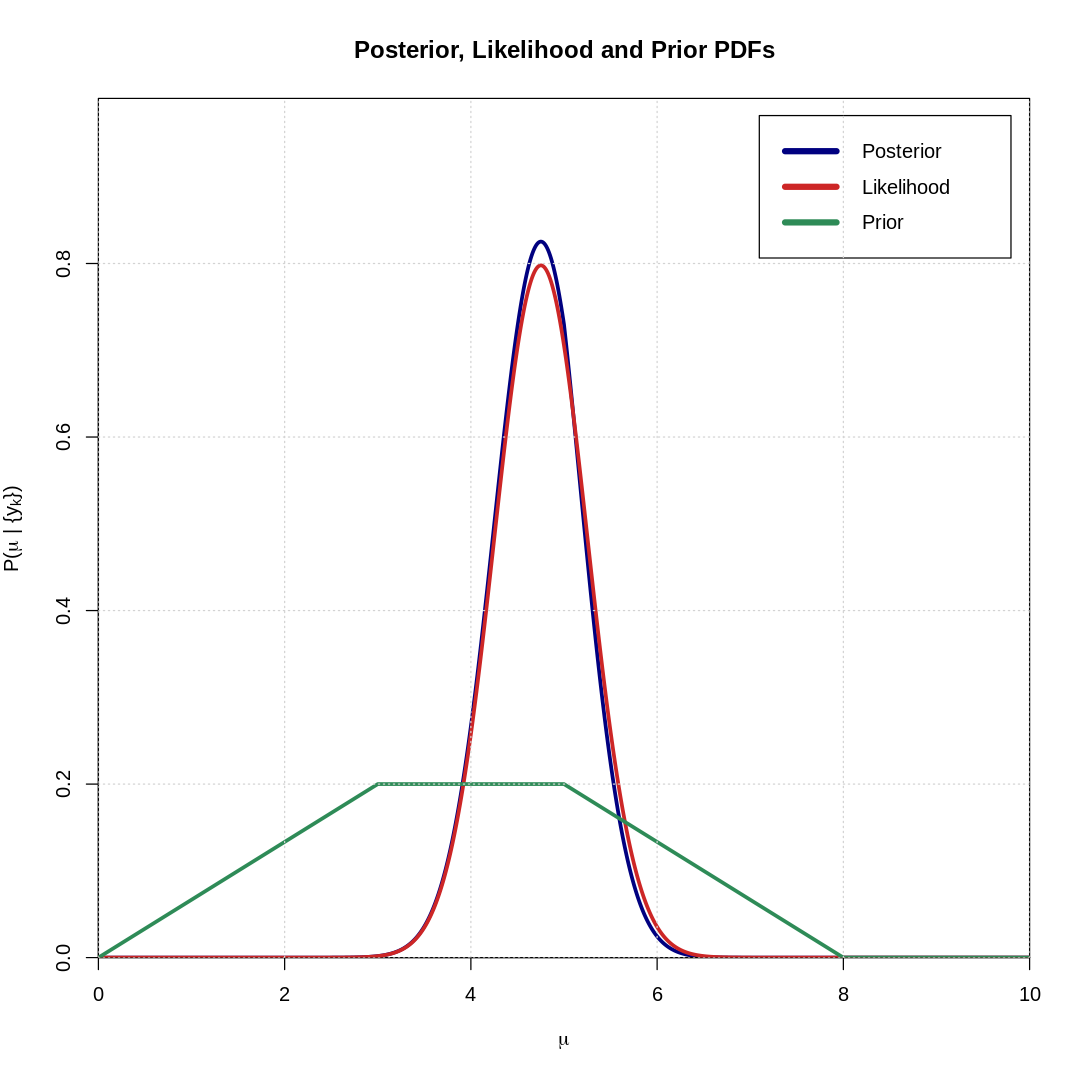

In [53]:
options(repr.plot.width=9, repr.plot.height=9)
plot(mu, p.post.n, 
     xaxs='i', yaxs='i', col='navy', 
     type='l', lty=1, lwd = 3, 
     ylim=c(0,1.2*max(max(p.post.n),max(p.like.n),max(p.prior.n))), 
     xlab=expression(mu),
     ylab=expression(paste("P","(", mu, " | {y"["k"],"})")),
     main='Posterior, Likelihood and Prior PDFs')
lines(mu, p.like.n, col='firebrick3',lwd=3, lty=1)
lines(mu, p.prior.n, col='seagreen',lwd=3, lty=1)

legend("topright",
       inset=0.02, 
       legend=c("Posterior", "Likelihood", "Prior"),
       col=c("navy", "firebrick3", "seagreen"), 
       lty=1:1, 
       cex=1,
       box.lty=1,
       lwd=5)
grid()

***
## Exercise 3 <a class="anchor" id="Ex3."></a>
* [Index](#ExI)
***

In [54]:
n <- 116
y <-  11

### 3.1. - Frequentist estimator for $p$ <a class="anchor" id="Ex3.1."></a>

In [55]:
p.f.1 <- y/n

In [56]:
cat("Frequentist estimator for p:", p.f.1)

Frequentist estimator for p: 0.09482759

### 3.2. - Posterior distribution $P(p|y)$ for $\text{Beta}(1,10)$ prior for $p$ <a class="anchor" id="Ex3.2."></a>

In [57]:
n.p <- 1001 # number of points in the plots
p   <- seq(0, 1, length.out=n.p)
Dp  <- p[2] - p[1]

In [58]:
p.post.1   <- dbinom(x=y, size=n, prob=p) * dbeta(p, shape1=1, shape2=10)
p.post.n.1 <- p.post.1 / (Dp*sum(p.post.1))

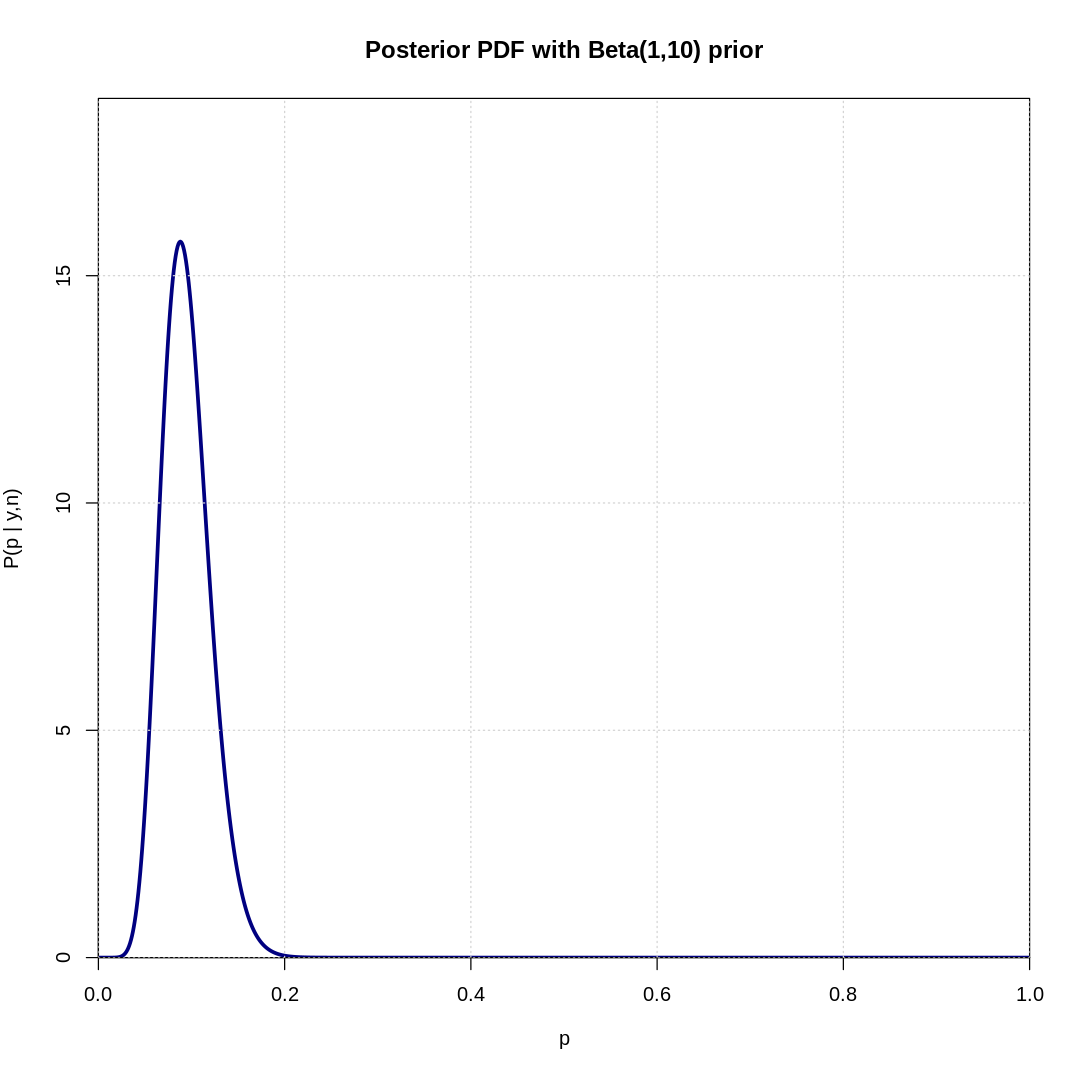

In [59]:
options(repr.plot.width=9, repr.plot.height=9)
plot(p, p.post.n.1, 
     xaxs='i', yaxs='i', col='navy', 
     type='l', lty=1, lwd = 3, 
     ylim=c(0,1.2*max(p.post.n.1)), 
     xlab=expression(p),
     ylab=expression(paste("P","(", p, " | y,n)")),
     main='Posterior PDF with Beta(1,10) prior')
grid()

### 3.3. - Bayesian estimator for $p$, posterior mean and variance, and 95% credibility interval <a class="anchor" id="Ex3.3."></a>

**Bayesian estimator for $p$**

In [60]:
p.b.1 <- (y+1) / (n+1+10)

In [61]:
cat("Bayesian estimator for p:", p.b.1)

Bayesian estimator for p: 0.09448819

**Posterior mean and variance**

In [62]:
p.mean.1 <- compute.mean(p, p.post.n.1)
p.var.1  <- compute.var (p, p.post.n.1)
p.sd.1   <- sqrt(p.var.1)

In [63]:
cat("Posterior mean    :", p.mean.1, "\n")
cat("Posterior variance:", p.var.1,  "\n")
cat("Posterior s.d.    :", p.sd.1)

Posterior mean    : 0.09448819 
Posterior variance: 0.0006684388 
Posterior s.d.    : 0.02585418

**95% credibility interval**

In [64]:
p.m.1 <- get.x.dmax(p, p.post.n.1)
p.c.1 <- get.c.int (p, p.post.n.1)

In [65]:
cat("Most probable value:", round(p.m.1,4), "\n")

Most probable value: 0.088 


In [66]:
cat("95% C.I.: [", round(p.c.1[1],4), ", ", round(p.c.1[2],4), "]", "\n", sep="")

95% C.I.: [0.0497, 0.1503]


### 3.4. - Hypotesis test for both the frequentist and bayesian approach <a class="anchor" id="Ex3.4."></a>

**What we have to do now is a two-sides hypothesis test. For convention, $\alpha=0.05$ and we introduce the two hypotheses under test:**

* **$H_0 : p=0.1$, the null hypothesis;**
* **$H_1 : p \ne 0.1$, the alternate hypothesis.**

In [67]:
p.H0  <- 0.1
alpha <- 0.05

**Frequentist approach**

In [68]:
ys <- c(0:n)
ps <- pbinom(ys, size=n, p=p.H0)
ys.0.025 <- ys[ps<=0.025]
ys.0.975 <- ys[(1-ps)<=0.025]

In [69]:
ys.acc <- ys[ps>0.025 & (1-ps)>0.025]

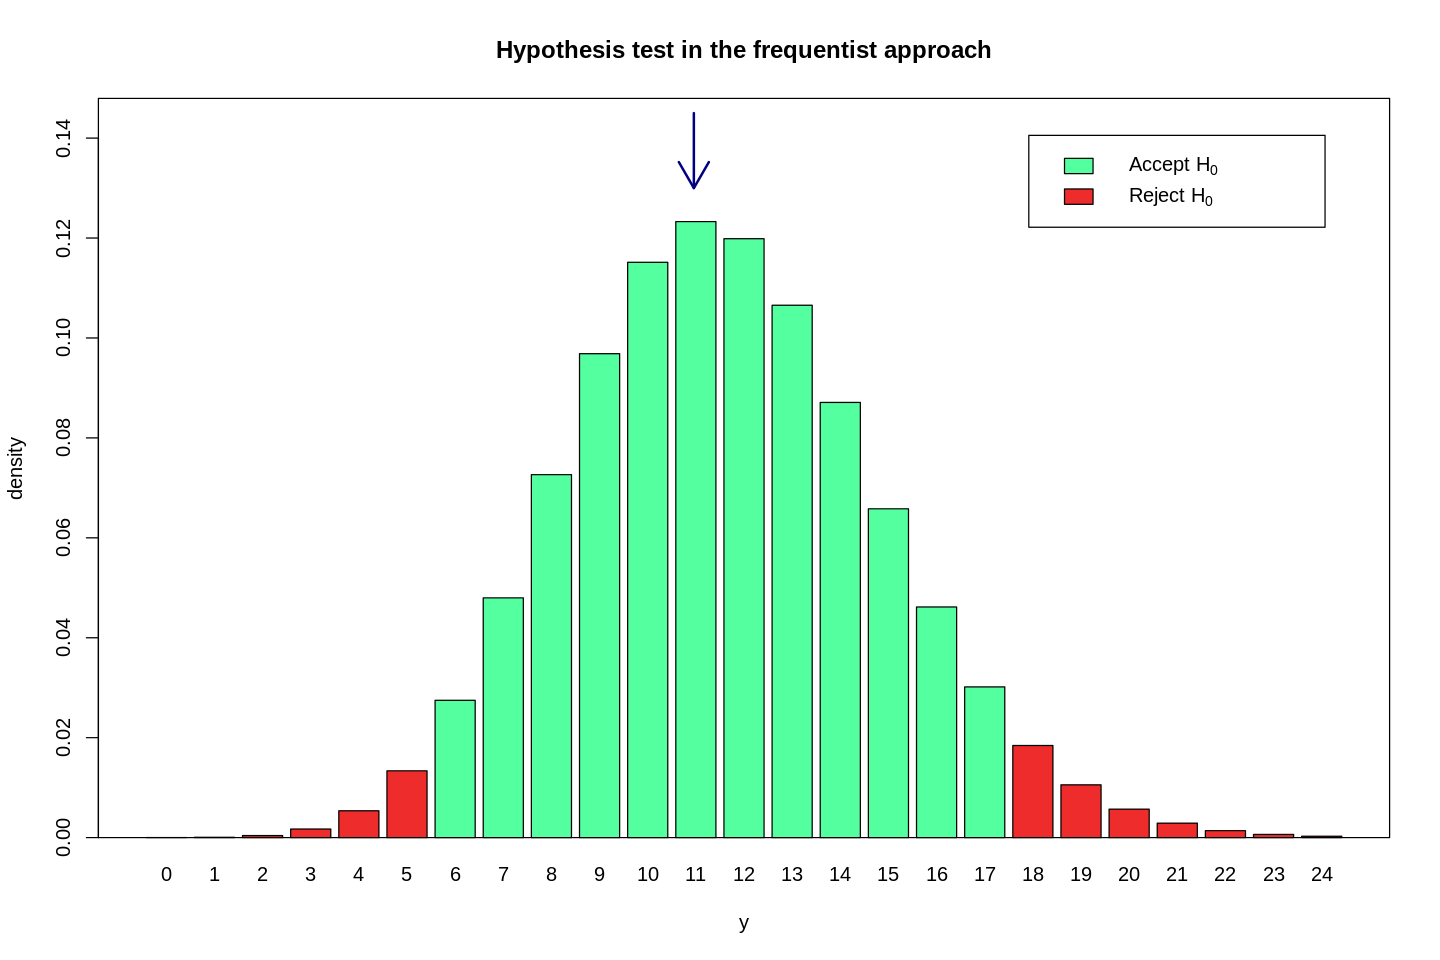

In [70]:
ddata  <- dbinom(ys, size=n, p=p.H0)
colors <- c(rep("firebrick2", length(ys.0.025)),
            rep("seagreen1",  length(ys.acc)),
            rep("firebrick2", length(ys.0.975)))

options(repr.plot.width=12, repr.plot.height=8)
barplot(height=ddata[1:25],
        names.arg=ys[1:25],
        col=colors[1:25],
        ylim=c(0,1.2*max(ddata)),
        xlab="y",
        ylab="density",
        main="Hypothesis test in the frequentist approach")
arrows(x0=y+2.85, y0=0.145, x1=y+2.85, y1=0.13, lwd=2, col="navy")
legend(x="topright", 
       inset=0.05,
       legend=c(TeX("Accept $H_0$"),TeX("Reject $H_0$")),
       fill=c("seagreen1","firebrick2"))
box()

**As it is possible to see from the barplot in the cell above, in the frequentist approach we can not reject the null hypothesis since the measurement $y=11$ falls in the acceptance region.** 

**Bayesian approach**

In [71]:
p.c.1 <- get.c.int(p, p.post.n.1, cl=0.95)

In [72]:
# code for polygon function
ps.acc.1  <- seq(p.c.1[1], p.c.1[2], length.out=length(p))
ps.r1.1   <- seq(0,        p.c.1[1], length.out=length(p))
ps.r2.1   <- seq(p.c.1[2], 1,        length.out=length(p))
Dps.acc.1 <- ps.acc.1[2] - ps.acc.1[1]
Dps.r1.1  <- ps.r1.1[2]  - ps.r1.1[1]
Dps.r2.1  <- ps.r2.1[2]  - ps.r2.1[1]

ds.acc.1 <- dbinom(x=y, size=n, prob=ps.acc.1) * dbeta(ps.acc.1, shape1=1, shape2=10) / (Dp*sum(p.post.1))
ds.r1.1  <- dbinom(x=y, size=n, prob=ps.r1.1)  * dbeta(ps.r1.1,  shape1=1, shape2=10) / (Dp*sum(p.post.1))
ds.r2.1  <- dbinom(x=y, size=n, prob=ps.r2.1)  * dbeta(ps.r2.1,  shape1=1, shape2=10) / (Dp*sum(p.post.1))

ps.acc.1 <- c(p.c.1[1], ps.acc.1, p.c.1[2])
ps.r1.1  <- c(0,        ps.r1.1,  p.c.1[1])
ps.r2.1  <- c(p.c.1[2], ps.r2.1,  1)
ds.acc.1 <- c(0, ds.acc.1, 0)
ds.r1.1  <- c(0, ds.r1.1,  0)
ds.r2.1  <- c(0, ds.r2.1,  0)

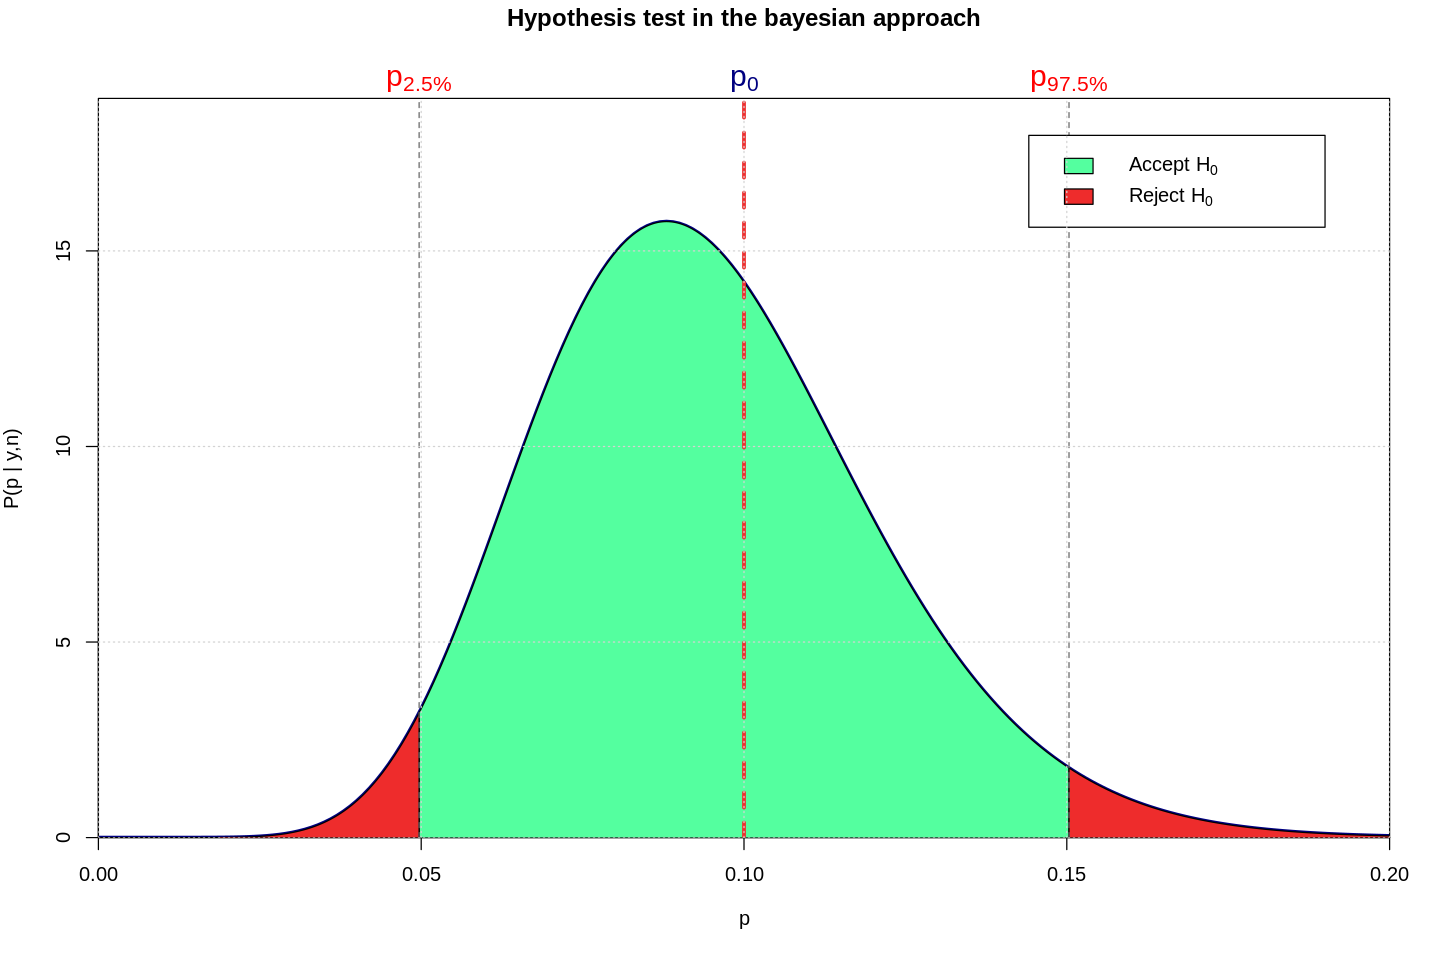

In [73]:
options(repr.plot.width=12, repr.plot.height=8)
plot(p, p.post.n.1, 
     xaxs='i', yaxs='i', col='navy', 
     type='l', lty=1, lwd = 3, 
     xlim=c(0,0.2),
     ylim=c(0,1.2*max(p.post.n.1)), 
     xlab=expression(p),
     ylab=expression(paste("P","(", p, " | y,n)")))
polygon(x=ps.acc.1, y=ds.acc.1, col='seagreen1')
polygon(x=ps.r1.1,  y=ds.r1.1,  col='firebrick2')
polygon(x=ps.r2.1,  y=ds.r2.1,  col='firebrick2')
abline(v=p.c.1[1], col="grey40", lty=2)
abline(v=p.c.1[2], col="grey40", lty=2)
abline(v=p.H0,     col="firebrick2", lty=2, lwd=3)
text(p.c.1[1], 1.05*par("usr")[4], labels=expression(p["2.5%"]),  pos=1, cex=1.5, col="red",  xpd=TRUE)
text(p.c.1[2], 1.05*par("usr")[4], labels=expression(p["97.5%"]), pos=1, cex=1.5, col="red",  xpd=TRUE)
text(p.H0,     1.05*par("usr")[4], labels=expression(p["0"]),     pos=1, cex=1.5, col="navy", xpd=TRUE)
title("Hypothesis test in the bayesian approach", line=3)
legend(x="topright", 
       inset=0.05,
       legend=c(TeX("Accept $H_0$"),TeX("Reject $H_0$")),
       fill=c("seagreen1","firebrick2"))
grid()

**As it is possible to see from the plot in the cell above, in the bayesian approach (with this prior) we can not reject the null hypothesis at a 5% level of significance since $p_0$ falls in the acceptance region.** 

### 3.5. - Frequentist estimator for $p$ (new measurement) <a class="anchor" id="Ex3.5."></a>

In [74]:
n <- 165
y <-   9

In [75]:
p.f.2 <- y/n

In [76]:
cat("Frequentist estimator for p (new measurement):", p.f.2)

Frequentist estimator for p (new measurement): 0.05454545

### 3.6. - Bayesian estimator for $p$ with different priors (new measurement) <a class="anchor" id="Ex3.6."></a>

**Bayesian estimator for $p$ using as new prior a $\text{Beta}(1,10)$**

In [77]:
p.b.2.b <- (y+1) / (n+1+10)

In [78]:
cat("Bayesian estimator for p (new measurement, beta prior):", p.b.2.b)

Bayesian estimator for p (new measurement, beta prior): 0.05681818

**Bayesian estimator for $p$ using as new prior the old posterior**

$$
p_B = \frac{y_1 + y_2 + \alpha_1}{n_1 + n_2 + \alpha + \beta}
$$

In [79]:
n.old <- 116
y.old <-  11

In [80]:
p.b.2.o <- (y+y.old+1) / (n+n.old+1+10)

In [81]:
cat("Bayesian estimator for p (new measurement, old posterior as prior):", p.b.2.o)

Bayesian estimator for p (new measurement, old posterior as prior): 0.07191781

### 3.7. - Bayesian estimator for $p$, posterior mean and variance, and 95% credibility interval (new measurement) <a class="anchor" id="Ex3.7."></a>

**Bayesian estimator for $p$, posterior mean and variance, and 95% credibility interval (new measurement) using as new prior a $\text{Beta}(1,10)$**

In [82]:
# compute posterior distribution
p.post.2.b   <- dbinom(x=y, size=n, prob=p) * dbeta(p, shape1=1, shape2=10)
p.post.n.2.b <- p.post.2.b / (Dp*sum(p.post.2.b))

In [83]:
# compute mean, variance and standard deviation numerically
p.mean.2.b <- compute.mean(p, p.post.n.2.b)
p.var.2.b  <- compute.var (p, p.post.n.2.b)
p.sd.2.b   <- sqrt(p.var.2.b)

In [84]:
# show the results for mean, variance and standard deviation
cat("Posterior mean    :", p.mean.2.b, "\n")
cat("Posterior variance:", p.var.2.b,  "\n")
cat("Posterior s.d.    :", p.sd.2.b)

Posterior mean    : 0.05681818 
Posterior variance: 0.0003027677 
Posterior s.d.    : 0.01740022

In [85]:
# compute most probable value and 95% credibility interval bounds numerically
p.m.2.b <- get.x.dmax(p, p.post.n.2.b)
p.c.2.b <- get.c.int (p, p.post.n.2.b)

In [86]:
# show the result for most probable value
cat("Most probable value:", round(p.m.2.b,4), "\n")

Most probable value: 0.0517 


In [87]:
# show the result for 95% credibility interval bounds
cat("95% C.I.: [", round(p.c.2.b[1],4), ", ", round(p.c.2.b[2],4), "]", "\n", sep="")

95% C.I.: [0.0272, 0.0949]


**Bayesian estimator for $p$, posterior mean and variance, and 95% credibility interval (new measurement) using as new prior the old posterior**

In [88]:
# compute posterior distribution
p.post.2.o   <- dbinom(x=y, size=n, prob=p) * dbinom(x=y.old, size=n.old, prob=p) * dbeta(p, shape1=1, shape2=10)
p.post.n.2.o <- p.post.2.o / (Dp*sum(p.post.2.o))

In [89]:
# compute mean, variance and standard deviation numerically
p.mean.2.o <- compute.mean(p, p.post.n.2.o)
p.var.2.o  <- compute.var (p, p.post.n.2.o)
p.sd.2.o   <- sqrt(p.var.2.o)

In [90]:
# show the results for mean, variance and standard deviation
cat("Posterior mean    :", p.mean.2.o, "\n")
cat("Posterior variance:", p.var.2.o,  "\n")
cat("Posterior s.d.    :", p.sd.2.o)

Posterior mean    : 0.07191781 
Posterior variance: 0.0002278008 
Posterior s.d.    : 0.01509307

In [91]:
# compute most probable value and 95% credibility interval bounds numerically
p.m.2.o <- get.x.dmax(p, p.post.n.2.o)
p.c.2.o <- get.c.int (p, p.post.n.2.o)

In [92]:
# show the result for most probable value
cat("Most probable value:", round(p.m.2.o,4), "\n")

Most probable value: 0.069 


In [93]:
# show the result for 95% credibility interval bounds
cat("95% C.I.: [", round(p.c.2.o[1],4), ", ", round(p.c.2.o[2],4), "]", "\n", sep="")

95% C.I.: [0.0447, 0.1037]


### 3.8. - Hypotesis test for both the frequentist and bayesian approach (new measurement) <a class="anchor" id="Ex3.8."></a>

**Again, we have to apply the two-sides hypothesis test. For convention, $\alpha=0.05$ and we introduce the two hypotheses under test:**

* **$H_0 : p=0.1$, the null hypothesis;**
* **$H_1 : p \ne 0.1$, the alternate hypothesis.**

In [94]:
p.H0  <- 0.1
alpha <- 0.05

**Frequentist approach**

In [95]:
ys <- c(0:n)
ps <- pbinom(ys, size=n, p=p.H0)
ys.0.025 <- ys[ps<=0.030]
ys.0.975 <- ys[(1-ps)<=0.020]

In [96]:
ys.acc <- ys[ps>0.030 & (1-ps)>0.020]

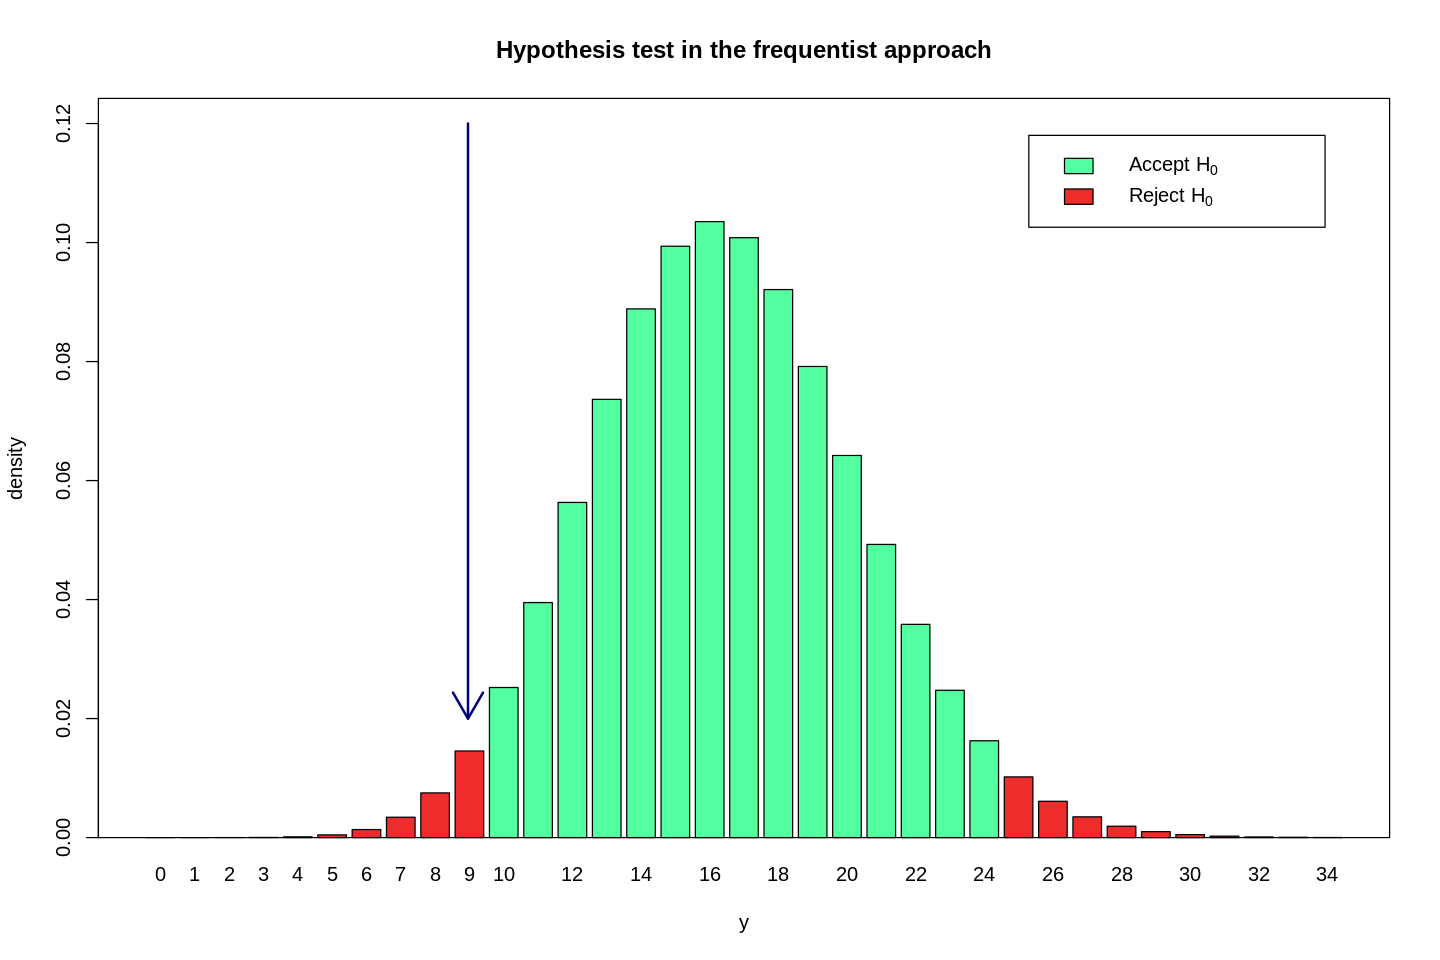

In [97]:
ddata  <- dbinom(ys, size=n, p=p.H0)
colors <- c(rep("firebrick2", length(ys.0.025)),
            rep("seagreen1",  length(ys.acc)),
            rep("firebrick2", length(ys.0.975)))

options(repr.plot.width=12, repr.plot.height=8)
barplot(height=ddata[1:35],
        names.arg=ys[1:35],
        col=colors[1:25],
        ylim=c(0,1.2*max(ddata)),
        xlab="y",
        ylab="density",
        main="Hypothesis test in the frequentist approach")
arrows(x0=y+2.45, y0=0.12, x1=y+2.45, y1=0.02, lwd=2, col="navy")
legend(x="topright", 
       inset=0.05,
       legend=c(TeX("Accept $H_0$"),TeX("Reject $H_0$")),
       fill=c("seagreen1","firebrick2"))
box()

**As it is possible to see from the barplot in the cell above, in the frequentist approach we reject the null hypothesis since the measurement $y=9$ falls in the rejection region (although it falls in the bound between acceptance and rejection regions).** 

**Bayesian approach with $\text{Beta}(1,10)$ prior**

In [98]:
p.c.2.b <- get.c.int(p, p.post.n.2.b, cl=0.95)

In [99]:
# code for polygon function
ps.acc.2.b  <- seq(p.c.2.b[1], p.c.2.b[2], length.out=length(p))
ps.r1.2.b   <- seq(0,          p.c.2.b[1], length.out=length(p))
ps.r2.2.b   <- seq(p.c.2.b[2], 1,          length.out=length(p))
Dps.acc.2.b <- ps.acc.2.b[2] - ps.acc.2.b[1]
Dps.r1.2.b  <- ps.r1.2.b[2]  - ps.r1.2.b[1]
Dps.r2.2.b  <- ps.r2.2.b[2]  - ps.r2.2.b[1]

ds.acc.2.b <- dbinom(x=y, size=n, prob=ps.acc.2.b) * dbeta(ps.acc.2.b, shape1=1, shape2=10) / (Dp*sum(p.post.2.b))
ds.r1.2.b  <- dbinom(x=y, size=n, prob=ps.r1.2.b)  * dbeta(ps.r1.2.b,  shape1=1, shape2=10) / (Dp*sum(p.post.2.b))
ds.r2.2.b  <- dbinom(x=y, size=n, prob=ps.r2.2.b)  * dbeta(ps.r2.2.b,  shape1=1, shape2=10) / (Dp*sum(p.post.2.b))

ps.acc.2.b <- c(p.c.2.b[1], ps.acc.2.b, p.c.2.b[2])
ps.r1.2.b  <- c(0,          ps.r1.2.b,  p.c.2.b[1])
ps.r2.2.b  <- c(p.c.2.b[2], ps.r2.2.b,  1)
ds.acc.2.b <- c(0, ds.acc.2.b, 0)
ds.r1.2.b  <- c(0, ds.r1.2.b,  0)
ds.r2.2.b  <- c(0, ds.r2.2.b,  0)

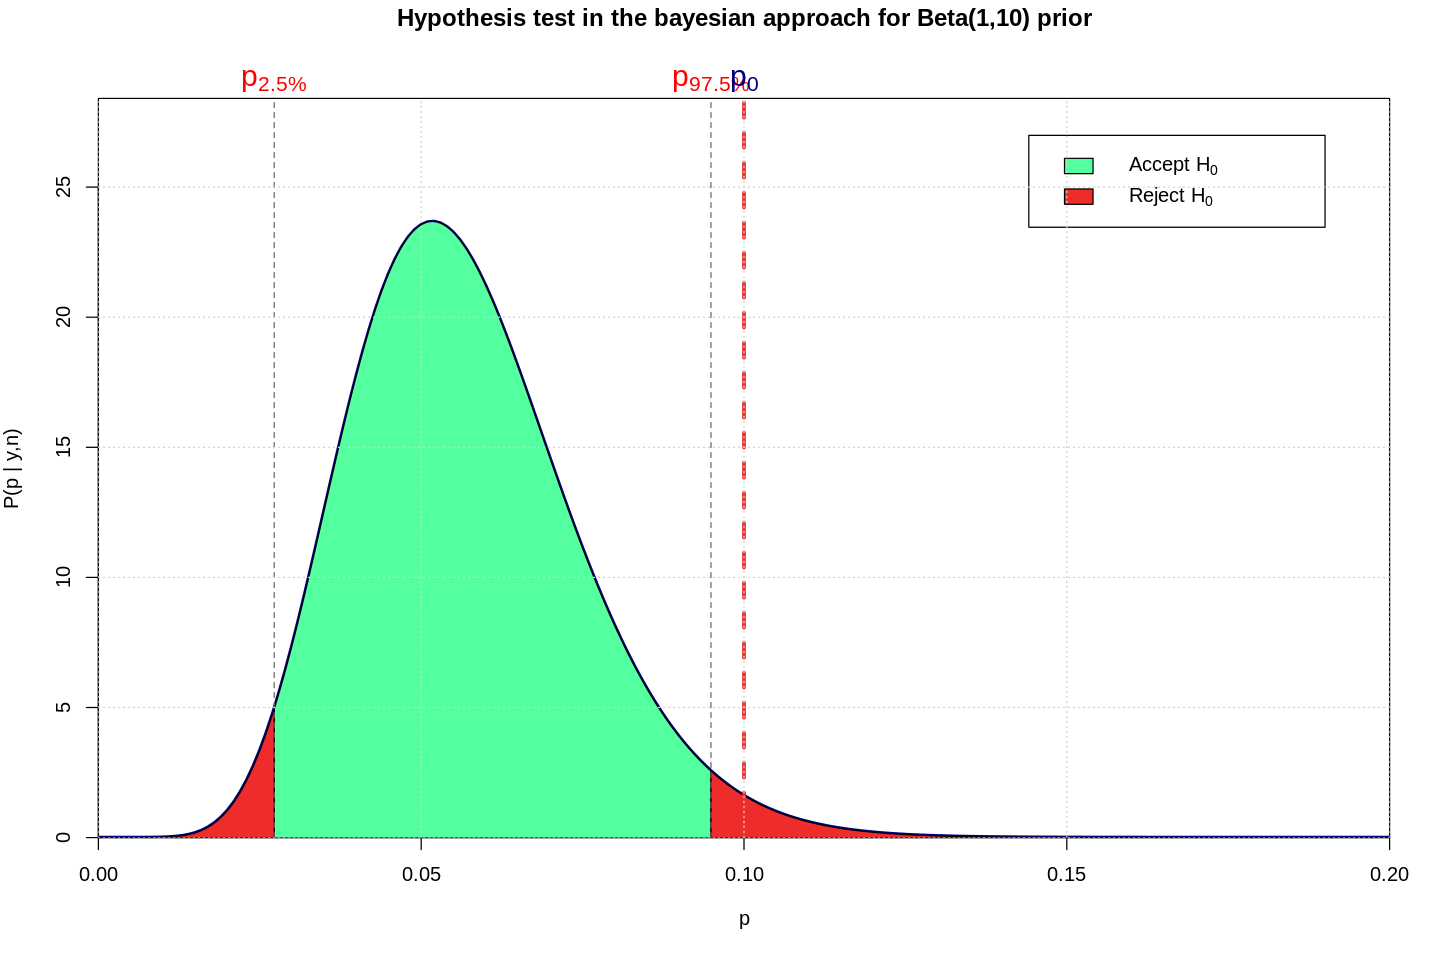

In [100]:
options(repr.plot.width=12, repr.plot.height=8)
plot(p, p.post.n.2.b, 
     xaxs='i', yaxs='i', col='navy', 
     type='l', lty=1, lwd = 3, 
     xlim=c(0,0.2),
     ylim=c(0,1.2*max(p.post.n.2.b)), 
     xlab=expression(p),
     ylab=expression(paste("P","(", p, " | y,n)")))
polygon(x=ps.acc.2.b, y=ds.acc.2.b, col='seagreen1')
polygon(x=ps.r1.2.b,  y=ds.r1.2.b,  col='firebrick2')
polygon(x=ps.r2.2.b,  y=ds.r2.2.b,  col='firebrick2')
abline(v=p.c.2.b[1], col="grey40",     lty=2)
abline(v=p.c.2.b[2], col="grey40",     lty=2)
abline(v=p.H0,       col="firebrick2", lty=2, lwd=3)
text(p.c.2.b[1], 1.05*par("usr")[4], labels=expression(p["2.5%"]),  pos=1, cex=1.5, col="red",  xpd=TRUE)
text(p.c.2.b[2], 1.05*par("usr")[4], labels=expression(p["97.5%"]), pos=1, cex=1.5, col="red",  xpd=TRUE)
text(p.H0,       1.05*par("usr")[4], labels=expression(p["0"]),     pos=1, cex=1.5, col="navy", xpd=TRUE)
title("Hypothesis test in the bayesian approach for Beta(1,10) prior", line=3)
legend(x="topright", 
       inset=0.05,
       legend=c(TeX("Accept $H_0$"),TeX("Reject $H_0$")),
       fill=c("seagreen1","firebrick2"))
grid()

**As it is possible to see from the plot in the cell above, in the bayesian approach (with this prior) we reject the null hypothesis at a 5% level of significance since $p_0$ falls in the rejection region.**

**Bayesian approach with the posterior of the previous measurement as new prior**

In [101]:
p.c.2.o <- get.c.int(p, p.post.n.2.o, cl=0.95)

In [102]:
# code for polygon function
ps.acc.2.o  <- seq(p.c.2.o[1], p.c.2.o[2], length.out=length(p))
ps.r1.2.o   <- seq(0,          p.c.2.o[1], length.out=length(p))
ps.r2.2.o   <- seq(p.c.2.o[2], 1,          length.out=length(p))
Dps.acc.2.o <- ps.acc.2.o[2] - ps.acc.2.o[1]
Dps.r1.2.o  <- ps.r1.2.o[2]  - ps.r1.2.o[1]
Dps.r2.2.o  <- ps.r2.2.o[2]  - ps.r2.2.o[1]

ds.acc.2.o <- dbinom(x=y, size=n, prob=ps.acc.2.o) *  dbinom(x=y.old, size=n.old, prob=ps.acc.2.o) * dbeta(ps.acc.2.o, shape1=1, shape2=10) / (Dp*sum(p.post.2.o))
ds.r1.2.o  <- dbinom(x=y, size=n, prob=ps.r1.2.o)  *  dbinom(x=y.old, size=n.old, prob=ps.r1.2.o)  * dbeta(ps.r1.2.o,  shape1=1, shape2=10) / (Dp*sum(p.post.2.o))
ds.r2.2.o  <- dbinom(x=y, size=n, prob=ps.r2.2.o)  *  dbinom(x=y.old, size=n.old, prob=ps.r2.2.o)  * dbeta(ps.r2.2.o,  shape1=1, shape2=10) / (Dp*sum(p.post.2.o))

ps.acc.2.o <- c(p.c.2.o[1], ps.acc.2.o, p.c.2.o[2])
ps.r1.2.o  <- c(0,          ps.r1.2.o,  p.c.2.o[1])
ps.r2.2.o  <- c(p.c.2.o[2], ps.r2.2.o,  1)
ds.acc.2.o <- c(0, ds.acc.2.o, 0)
ds.r1.2.o  <- c(0, ds.r1.2.o,  0)
ds.r2.2.o  <- c(0, ds.r2.2.o,  0)

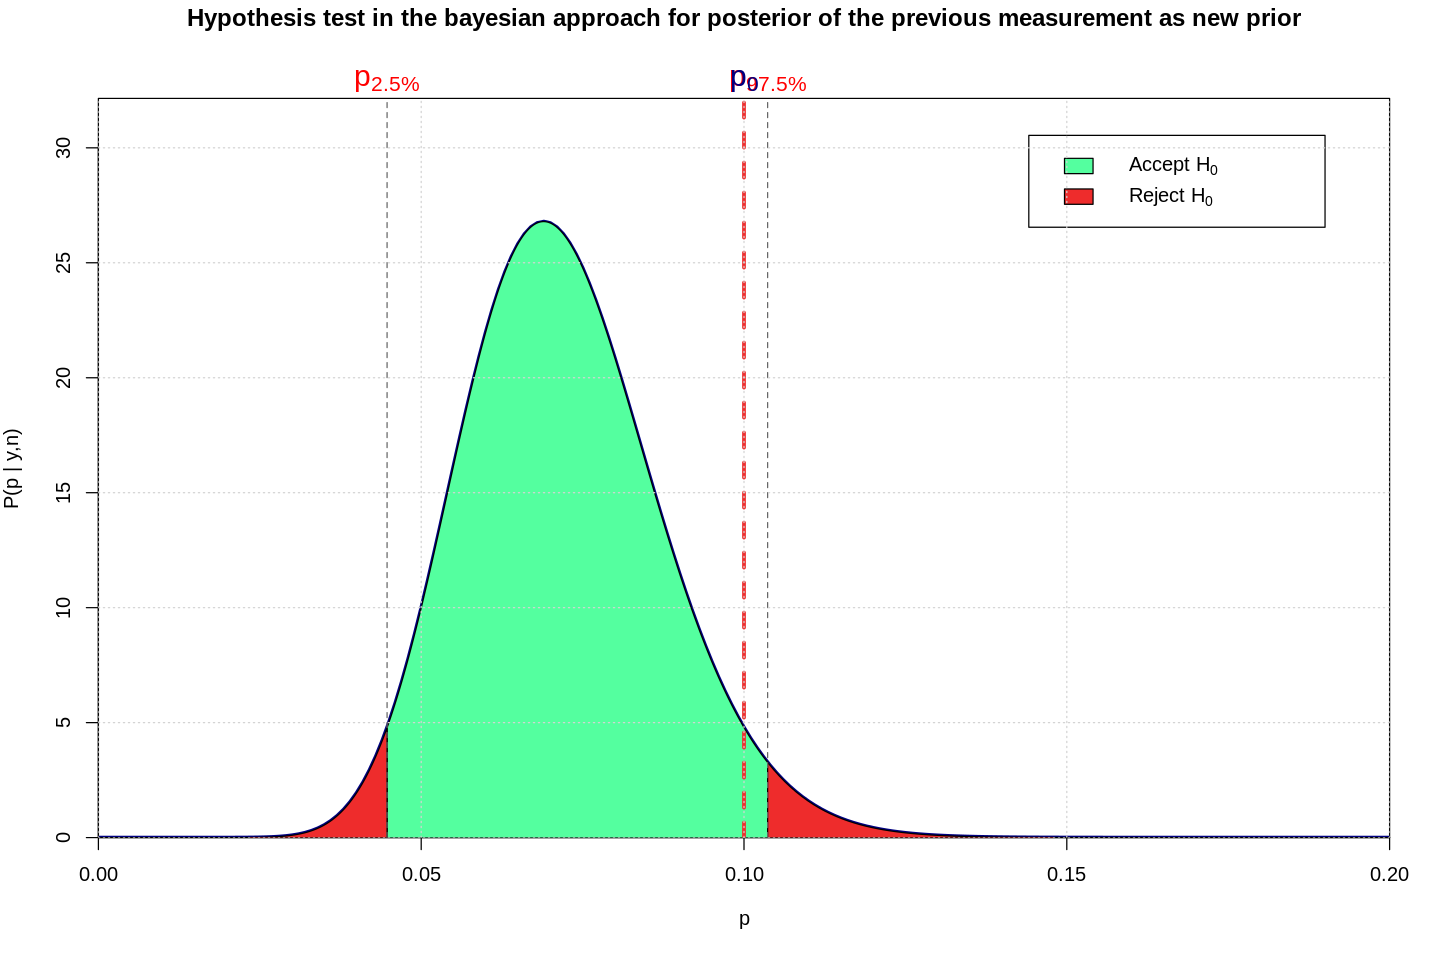

In [103]:
options(repr.plot.width=12, repr.plot.height=8)
plot(p, p.post.n.2.o, 
     xaxs='i', yaxs='i', col='navy', 
     type='l', lty=1, lwd = 3, 
     xlim=c(0,0.2),
     ylim=c(0,1.2*max(p.post.n.2.o)), 
     xlab=expression(p),
     ylab=expression(paste("P","(", p, " | y,n)")))
polygon(x=ps.acc.2.o, y=ds.acc.2.o, col='seagreen1')
polygon(x=ps.r1.2.o,  y=ds.r1.2.o,  col='firebrick2')
polygon(x=ps.r2.2.o,  y=ds.r2.2.o,  col='firebrick2')
abline(v=p.c.2.o[1], col="grey40",     lty=2)
abline(v=p.c.2.o[2], col="grey40",     lty=2)
abline(v=p.H0,       col="firebrick2", lty=2, lwd=3)
text(p.c.2.o[1], 1.05*par("usr")[4], labels=expression(p["2.5%"]),  pos=1, cex=1.5, col="red",  xpd=TRUE)
text(p.c.2.o[2], 1.05*par("usr")[4], labels=expression(p["97.5%"]), pos=1, cex=1.5, col="red",  xpd=TRUE)
text(p.H0,       1.05*par("usr")[4], labels=expression(p["0"]),     pos=1, cex=1.5, col="navy", xpd=TRUE)
title("Hypothesis test in the bayesian approach for posterior of the previous measurement as new prior", line=3)
legend(x="topright", 
       inset=0.05,
       legend=c(TeX("Accept $H_0$"),TeX("Reject $H_0$")),
       fill=c("seagreen1","firebrick2"))
grid()

**As it is possible to see from the plot in the cell above, in the bayesian approach (with this prior) we can not reject the null hypothesis at a 5% level of significance since $p_0$ falls in the acceptance region.**